# Example for using climate models - Application for the


## Load

In [1]:
%matplotlib widget
import time
import numpy as np
from pandas import read_csv
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

from aeromaps.core.process import create_process
from aeromaps.core.models import (
    models_complex,
    models_complex_improvedgwpstar,
    models_complex_fair,
)
from aeromaps.models.air_transport.aircraft_fleet_and_operations.fleet.fleet_model import (
    Fleet,
    AircraftParameters,
    Aircraft,
)

## 1. Comparison of climate models on historical data

### Simple GWP*

In [2]:
# Create process
process1 = create_process(
    models=models_complex,
    use_fleet_model=True,
    add_examples_aircraft_and_subcategory=False,
)

# Change end year
process1.parameters.end_year = 2100
process1.setup(add_examples_aircraft_and_subcategory=False)

# Climate models
process1.parameters.tcre_coefficient = 0.00045

### Improved GWP* with median TCRE

In [3]:
# Create process
process2 = create_process(
    models=models_complex_improvedgwpstar,
    use_fleet_model=True,
    add_examples_aircraft_and_subcategory=False,
)

# Change end year
process2.parameters.end_year = 2100
process2.setup(add_examples_aircraft_and_subcategory=False)

# Climate models
duration = 6
process2.parameters.tcre_coefficient = 0.00045
process2.parameters.contrails_gwpstar_variation_duration = duration
process2.parameters.contrails_gwpstar_s_coefficient = 0.0
process2.parameters.nox_short_term_o3_increase_gwpstar_variation_duration = duration
process2.parameters.nox_short_term_o3_increase_gwpstar_s_coefficient = 0.0
process2.parameters.nox_long_term_o3_decrease_gwpstar_variation_duration = 20.0
process2.parameters.nox_long_term_o3_decrease_gwpstar_s_coefficient = 0.25
process2.parameters.nox_ch4_decrease_gwpstar_variation_duration = 20.0
process2.parameters.nox_ch4_decrease_gwpstar_s_coefficient = 0.25
process2.parameters.nox_stratospheric_water_vapor_decrease_gwpstar_variation_duration = 20.0
process2.parameters.nox_stratospheric_water_vapor_decrease_gwpstar_s_coefficient = 0.25
process2.parameters.soot_gwpstar_variation_duration = duration
process2.parameters.soot_gwpstar_s_coefficient = 0.0
process2.parameters.h2o_gwpstar_variation_duration = duration
process2.parameters.h2o_gwpstar_s_coefficient = 0.0
process2.parameters.sulfur_gwpstar_variation_duration = duration
process2.parameters.sulfur_gwpstar_s_coefficient = 0.0

In [4]:
# Create process
process2s = create_process(
    models=models_complex_improvedgwpstar,
    use_fleet_model=True,
    add_examples_aircraft_and_subcategory=False,
)

# Change end year
process2s.parameters.end_year = 2100
process2s.setup(add_examples_aircraft_and_subcategory=False)

# Climate models
process2s.parameters.tcre_coefficient = 0.00045
process2s.parameters.contrails_gwpstar_variation_duration = 1.0
process2s.parameters.contrails_gwpstar_s_coefficient = 0.0
process2s.parameters.nox_short_term_o3_increase_gwpstar_variation_duration = 1.0
process2s.parameters.nox_short_term_o3_increase_gwpstar_s_coefficient = 0.0
process2s.parameters.nox_long_term_o3_decrease_gwpstar_variation_duration = 20.0
process2s.parameters.nox_long_term_o3_decrease_gwpstar_s_coefficient = 0.25
process2s.parameters.nox_ch4_decrease_gwpstar_variation_duration = 20.0
process2s.parameters.nox_ch4_decrease_gwpstar_s_coefficient = 0.25
process2s.parameters.nox_stratospheric_water_vapor_decrease_gwpstar_variation_duration = 20.0
process2s.parameters.nox_stratospheric_water_vapor_decrease_gwpstar_s_coefficient = 0.25
process2s.parameters.soot_gwpstar_variation_duration = 1.0
process2s.parameters.soot_gwpstar_s_coefficient = 0.0
process2s.parameters.h2o_gwpstar_variation_duration = 1.0
process2s.parameters.h2o_gwpstar_s_coefficient = 0.0
process2s.parameters.sulfur_gwpstar_variation_duration = 1.0
process2s.parameters.sulfur_gwpstar_s_coefficient = 0.0

### Improved GWP* with FaIR

In [5]:
# Create process
process3 = create_process(
    models=models_complex_fair,
    use_fleet_model=True,
    add_examples_aircraft_and_subcategory=False,
)

# Change end year
process3.parameters.end_year = 2100
process3.setup(add_examples_aircraft_and_subcategory=False)

# Climate models
process3.parameters.nox_long_term_o3_decrease_gwpstar_variation_duration = 20.0
process3.parameters.nox_long_term_o3_decrease_gwpstar_s_coefficient = 0.25
process3.parameters.nox_ch4_decrease_gwpstar_variation_duration = 20.0
process3.parameters.nox_ch4_decrease_gwpstar_s_coefficient = 0.25
process3.parameters.nox_stratospheric_water_vapor_decrease_gwpstar_variation_duration = 20.0
process3.parameters.nox_stratospheric_water_vapor_decrease_gwpstar_s_coefficient = 0.25

### Compute

In [6]:
process1.compute()
process2.compute()
process2s.compute()
t1 = time.time()
process3.compute()
t2 = time.time()
print("Computation time:", np.round(t2 - t1, 1), "s")

C:\Users\t.planes\PycharmProjects\AeroMAPS\aeromaps\models\base.py:74: UserWarning: Warning Message - Model name: coal_cost - Warning on AeromapsInterpolationFunction: The last reference year for the interpolation is lower than end_year, the value associated to the last reference year is therefore used as a constant for the upper years.
  warnings.warn(
C:\Users\t.planes\PycharmProjects\AeroMAPS\aeromaps\models\base.py:74: UserWarning: Warning Message - Model name: coal_cost - Warning on AeromapsInterpolationFunction: The last reference year for the interpolation is lower than end_year, the value associated to the last reference year is therefore used as a constant for the upper years.
  warnings.warn(
C:\Users\t.planes\PycharmProjects\AeroMAPS\aeromaps\models\base.py:74: UserWarning: Warning Message - Model name: electrolyser_capex - Warning on AeromapsInterpolationFunction: The last reference year for the interpolation is lower than end_year, the value associated to the last referenc

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Computation time: 6.3 s


### Results

In [7]:
# AeroMAPS results
data_temperature_aeromaps_simple_gwpstar = process1.data["climate_outputs"][
    "temperature_increase_from_aviation"
]
data_temperature_aeromaps_simple_gwpstar_co2 = process1.data["climate_outputs"][
    "temperature_increase_from_co2_from_aviation"
]
data_temperature_aeromaps_simple_gwpstar_non_co2 = process1.data["climate_outputs"][
    "temperature_increase_from_non_co2_from_aviation"
]
data_temperature_aeromaps_gwpstar = process2.data["climate_outputs"][
    "temperature_increase_from_aviation"
]
data_temperature_aeromaps_gwpstar_co2 = process2.data["climate_outputs"][
    "temperature_increase_from_co2_from_aviation"
]
data_temperature_aeromaps_gwpstar_non_co2 = process2.data["climate_outputs"][
    "temperature_increase_from_non_co2_from_aviation"
]
data_temperature_aeromaps_gwpstar_1y = process2s.data["climate_outputs"][
    "temperature_increase_from_aviation"
]
data_temperature_aeromaps_gwpstar_1y_co2 = process2s.data["climate_outputs"][
    "temperature_increase_from_co2_from_aviation"
]
data_temperature_aeromaps_gwpstar_1y_non_co2 = process2s.data["climate_outputs"][
    "temperature_increase_from_non_co2_from_aviation"
]
data_temperature_aeromaps_fair = process3.data["climate_outputs"][
    "temperature_increase_from_aviation"
]
data_temperature_aeromaps_fair_co2 = process3.data["climate_outputs"][
    "temperature_increase_from_co2_from_aviation"
]
data_temperature_aeromaps_fair_non_co2 = process3.data["climate_outputs"][
    "temperature_increase_from_non_co2_from_aviation"
]

# Reference results
reference_temperature_data_df = read_csv("data/reference_temperature_change_historic.csv", delimiter=";")
reference_temperature_data = reference_temperature_data_df.values
data_years = reference_temperature_data[:, 0]
data_temperature_grewe_curtech = reference_temperature_data[:, 1]
data_temperature_grewe_ecats = reference_temperature_data[:, 2]
data_temperature_klower = reference_temperature_data[:, 3]
data_temperature_klower_co2 = reference_temperature_data[:, 4]

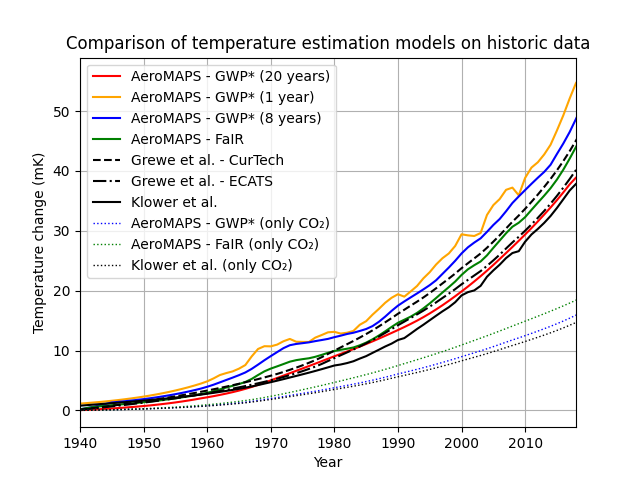

In [8]:
fig, ax = plt.subplots()
ax.plot(
    data_years,
    1000 * data_temperature_aeromaps_simple_gwpstar[0:80],
    color="red",
    label="AeroMAPS - GWP* (20 years)",
    linestyle="-",
)
ax.plot(
    data_years,
    1000 * data_temperature_aeromaps_gwpstar_1y[0:80],
    color="orange",
    label="AeroMAPS - GWP* (1 year)",
    linestyle="-",
)
ax.plot(
    data_years,
    1000 * data_temperature_aeromaps_gwpstar[0:80],
    color="blue",
    label="AeroMAPS - GWP* (8 years)",
    linestyle="-",
)
ax.plot(
    data_years,
    1000 * data_temperature_aeromaps_fair[0:80],
    color="green",
    label="AeroMAPS - FaIR",
    linestyle="-",
)
ax.plot(
    data_years,
    data_temperature_grewe_curtech,
    color="black",
    label="Grewe et al. - CurTech",
    linestyle="--",
)
ax.plot(
    data_years,
    data_temperature_grewe_ecats,
    color="black",
    label="Grewe et al. - ECATS",
    linestyle="-.",
)
ax.plot(data_years, data_temperature_klower, color="black", label="Klower et al.", linestyle="-")
ax.plot(
    data_years,
    1000 * data_temperature_aeromaps_gwpstar_co2[0:80],
    color="blue",
    label="AeroMAPS - GWP* (only CO₂)",
    linestyle=":",
    linewidth=1,
)
ax.plot(
    data_years,
    1000 * data_temperature_aeromaps_fair_co2[0:80],
    color="green",
    label="AeroMAPS - FaIR (only CO₂)",
    linestyle=":",
    linewidth=1,
)
ax.plot(
    data_years,
    data_temperature_klower_co2,
    color="black",
    label="Klower et al. (only CO₂)",
    linestyle=":",
    linewidth=1,
)
ax.set(
    xlabel="Year",
    ylabel="Temperature change (mK)",
    title="Comparison of temperature estimation models on historic data",
)
ax.grid()
plt.xlim(1940, 2018)
plt.legend()
plt.show()

In [9]:
data_temperature_aeromaps_gwpstar = process2.data["climate_outputs"][
    "temperature_increase_from_aviation"
]
data_temperature_aeromaps_gwpstar_co2 = process2.data["climate_outputs"][
    "temperature_increase_from_co2_from_aviation"
]
data_temperature_aeromaps_gwpstar_contrails = process2.data["climate_outputs"][
    "temperature_increase_from_contrails_from_aviation"
]
data_temperature_aeromaps_gwpstar_nox_short_term_o3_increase = process2.data["climate_outputs"][
    "temperature_increase_from_nox_short_term_o3_increase_from_aviation"
]
data_temperature_aeromaps_gwpstar_h2o = process2.data["climate_outputs"][
    "temperature_increase_from_h2o_from_aviation"
]
data_temperature_aeromaps_gwpstar_nox_neg = (
    process2.data["climate_outputs"][
        "temperature_increase_from_nox_long_term_o3_decrease_from_aviation"
    ]
    + process2.data["climate_outputs"]["temperature_increase_from_nox_ch4_decrease_from_aviation"]
    + process2.data["climate_outputs"][
        "temperature_increase_from_nox_stratospheric_water_vapor_decrease_from_aviation"
    ]
)
data_temperature_aeromaps_gwpstar_aerosols = (
    process2.data["climate_outputs"]["temperature_increase_from_soot_from_aviation"]
    + process2.data["climate_outputs"]["temperature_increase_from_sulfur_from_aviation"]
)

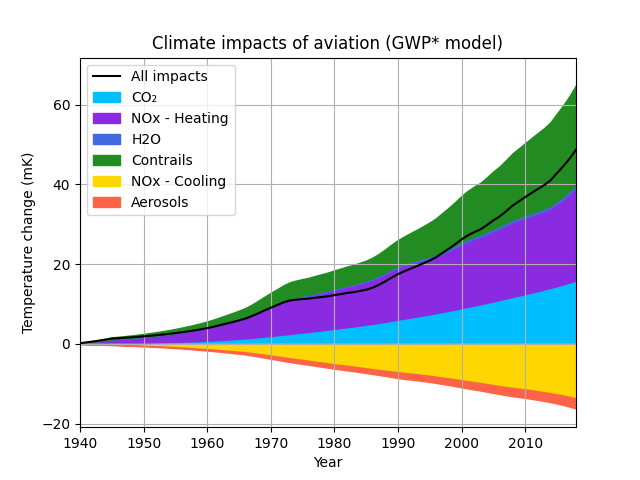

In [10]:
fig, ax = plt.subplots()

ax.plot(
    data_years,
    1000 * data_temperature_aeromaps_gwpstar[0:80],
    color="black",
    label="All impacts",
    linestyle="-",
)

ax.fill_between(
    data_years,
    np.zeros(80),
    1000 * data_temperature_aeromaps_gwpstar_co2[0:80],
    color="deepskyblue",
    label="CO₂",
)

ax.fill_between(
    data_years,
    1000 * data_temperature_aeromaps_gwpstar_co2[0:80],
    1000 * data_temperature_aeromaps_gwpstar_co2[0:80]
    + 1000 * data_temperature_aeromaps_gwpstar_nox_short_term_o3_increase[0:80],
    color="blueviolet",
    label="NOx - Heating",
)

ax.fill_between(
    data_years,
    1000 * data_temperature_aeromaps_gwpstar_co2[0:80]
    + 1000 * data_temperature_aeromaps_gwpstar_nox_short_term_o3_increase[0:80],
    1000 * data_temperature_aeromaps_gwpstar_co2[0:80]
    + 1000 * data_temperature_aeromaps_gwpstar_nox_short_term_o3_increase[0:80]
    + 1000 * data_temperature_aeromaps_gwpstar_h2o[0:80],
    color="royalblue",
    label="H2O",
)

ax.fill_between(
    data_years,
    1000 * data_temperature_aeromaps_gwpstar_co2[0:80]
    + 1000 * data_temperature_aeromaps_gwpstar_nox_short_term_o3_increase[0:80]
    + 1000 * data_temperature_aeromaps_gwpstar_h2o[0:80],
    1000 * data_temperature_aeromaps_gwpstar_co2[0:80]
    + 1000 * data_temperature_aeromaps_gwpstar_nox_short_term_o3_increase[0:80]
    + 1000 * data_temperature_aeromaps_gwpstar_h2o[0:80]
    + 1000 * data_temperature_aeromaps_gwpstar_contrails[0:80],
    color="forestgreen",
    label="Contrails",
)

ax.fill_between(
    data_years,
    np.zeros(80),
    1000 * data_temperature_aeromaps_gwpstar_nox_neg[0:80],
    color="gold",
    label="NOx - Cooling",
)

ax.fill_between(
    data_years,
    1000 * data_temperature_aeromaps_gwpstar_nox_neg[0:80],
    1000 * data_temperature_aeromaps_gwpstar_nox_neg[0:80]
    + 1000 * data_temperature_aeromaps_gwpstar_aerosols[0:80],
    color="tomato",
    label="Aerosols",
)

ax.set(
    xlabel="Year",
    ylabel="Temperature change (mK)",
    title="Climate impacts of aviation (GWP* model)",
)
ax.grid()
plt.xlim(1940, 2018)
plt.legend()
plt.show()

In [11]:
data_temperature_aeromaps_fair = process3.data["climate_outputs"][
    "temperature_increase_from_aviation"
]
data_temperature_aeromaps_fair_co2 = process3.data["climate_outputs"][
    "temperature_increase_from_co2_from_aviation"
]
data_temperature_aeromaps_fair_contrails = process3.data["climate_outputs"][
    "temperature_increase_from_contrails_from_aviation"
]
data_temperature_aeromaps_fair_nox_short_term_o3_increase = process3.data["climate_outputs"][
    "temperature_increase_from_nox_short_term_o3_increase_from_aviation"
]
data_temperature_aeromaps_fair_h2o = process3.data["climate_outputs"][
    "temperature_increase_from_h2o_from_aviation"
]
data_temperature_aeromaps_fair_nox_neg = (
    process3.data["climate_outputs"][
        "temperature_increase_from_nox_long_term_o3_decrease_from_aviation"
    ]
    + process3.data["climate_outputs"]["temperature_increase_from_nox_ch4_decrease_from_aviation"]
    + process3.data["climate_outputs"][
        "temperature_increase_from_nox_stratospheric_water_vapor_decrease_from_aviation"
    ]
)
data_temperature_aeromaps_fair_aerosols = (
    process3.data["climate_outputs"]["temperature_increase_from_soot_from_aviation"]
    + process3.data["climate_outputs"]["temperature_increase_from_sulfur_from_aviation"]
)

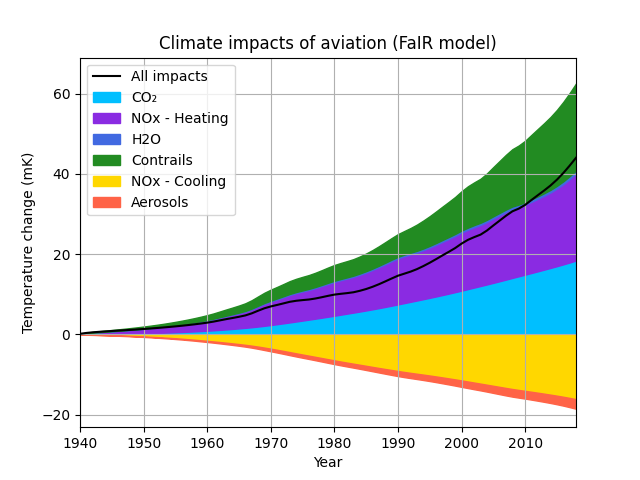

In [12]:
fig, ax = plt.subplots()

ax.plot(
    data_years,
    1000 * data_temperature_aeromaps_fair[0:80],
    color="black",
    label="All impacts",
    linestyle="-",
)

ax.fill_between(
    data_years,
    np.zeros(80),
    1000 * data_temperature_aeromaps_fair_co2[0:80],
    color="deepskyblue",
    label="CO₂",
)

ax.fill_between(
    data_years,
    1000 * data_temperature_aeromaps_fair_co2[0:80],
    1000 * data_temperature_aeromaps_fair_co2[0:80]
    + 1000 * data_temperature_aeromaps_fair_nox_short_term_o3_increase[0:80],
    color="blueviolet",
    label="NOx - Heating",
)

ax.fill_between(
    data_years,
    1000 * data_temperature_aeromaps_fair_co2[0:80]
    + 1000 * data_temperature_aeromaps_fair_nox_short_term_o3_increase[0:80],
    1000 * data_temperature_aeromaps_fair_co2[0:80]
    + 1000 * data_temperature_aeromaps_fair_nox_short_term_o3_increase[0:80]
    + 1000 * data_temperature_aeromaps_fair_h2o[0:80],
    color="royalblue",
    label="H2O",
)

ax.fill_between(
    data_years,
    1000 * data_temperature_aeromaps_fair_co2[0:80]
    + 1000 * data_temperature_aeromaps_fair_nox_short_term_o3_increase[0:80]
    + 1000 * data_temperature_aeromaps_fair_h2o[0:80],
    1000 * data_temperature_aeromaps_fair_co2[0:80]
    + 1000 * data_temperature_aeromaps_fair_nox_short_term_o3_increase[0:80]
    + 1000 * data_temperature_aeromaps_fair_h2o[0:80]
    + 1000 * data_temperature_aeromaps_fair_contrails[0:80],
    color="forestgreen",
    label="Contrails",
)

ax.fill_between(
    data_years,
    np.zeros(80),
    1000 * data_temperature_aeromaps_fair_nox_neg[0:80],
    color="gold",
    label="NOx - Cooling",
)

ax.fill_between(
    data_years,
    1000 * data_temperature_aeromaps_fair_nox_neg[0:80],
    1000 * data_temperature_aeromaps_fair_nox_neg[0:80]
    + 1000 * data_temperature_aeromaps_fair_aerosols[0:80],
    color="tomato",
    label="Aerosols",
)

ax.set(
    xlabel="Year",
    ylabel="Temperature change (mK)",
    title="Climate impacts of aviation (FaIR model)",
)
ax.grid()
plt.xlim(1940, 2018)
plt.legend()
plt.show()

## 2. Comparison of climate models on prospective data

In [13]:
# Create process
process4 = create_process(
    models=models_complex_fair,
    use_fleet_model=True,
    add_examples_aircraft_and_subcategory=False,
)

# Change end year
process4.parameters.end_year = 2100
process4.setup(add_examples_aircraft_and_subcategory=False)

# Climate models
process4.parameters.nox_long_term_o3_decrease_gwpstar_variation_duration = 20.0
process4.parameters.nox_long_term_o3_decrease_gwpstar_s_coefficient = 0.25
process4.parameters.nox_ch4_decrease_gwpstar_variation_duration = 20.0
process4.parameters.nox_ch4_decrease_gwpstar_s_coefficient = 0.25
process4.parameters.nox_stratospheric_water_vapor_decrease_gwpstar_variation_duration = 20.0
process4.parameters.nox_stratospheric_water_vapor_decrease_gwpstar_s_coefficient = 0.25

# Scenario settings
process4.parameters.cagr_passenger_short_range_reference_periods = []
process4.parameters.cagr_passenger_short_range_reference_periods_values = [3.0]
process4.parameters.cagr_passenger_medium_range_reference_periods = []
process4.parameters.cagr_passenger_medium_range_reference_periods_values = [3.0]
process4.parameters.cagr_passenger_long_range_reference_periods = []
process4.parameters.cagr_passenger_long_range_reference_periods_values = [3.0]
process4.parameters.cagr_freight_reference_periods = []
process4.parameters.cagr_freight_reference_periods_values = [3.0]
process4.parameters.load_factor_end_year = 82.399312

In [14]:
# Create process
process4b = create_process(
    models=models_complex_improvedgwpstar,
    use_fleet_model=True,
    add_examples_aircraft_and_subcategory=False,
)

# Change end year
process4b.parameters.end_year = 2100
process4b.setup(add_examples_aircraft_and_subcategory=False)

# Climate models
process4b.parameters.tcre_coefficient = 0.00045
process4b.parameters.contrails_gwpstar_variation_duration = duration
process4b.parameters.contrails_gwpstar_s_coefficient = 0.0
process4b.parameters.nox_short_term_o3_increase_gwpstar_variation_duration = duration
process4b.parameters.nox_short_term_o3_increase_gwpstar_s_coefficient = 0.0
process4b.parameters.nox_long_term_o3_decrease_gwpstar_variation_duration = 20.0
process4b.parameters.nox_long_term_o3_decrease_gwpstar_s_coefficient = 0.25
process4b.parameters.nox_ch4_decrease_gwpstar_variation_duration = 20.0
process4b.parameters.nox_ch4_decrease_gwpstar_s_coefficient = 0.25
process4b.parameters.nox_stratospheric_water_vapor_decrease_gwpstar_variation_duration = 20.0
process4b.parameters.nox_stratospheric_water_vapor_decrease_gwpstar_s_coefficient = 0.25
process4b.parameters.soot_gwpstar_variation_duration = duration
process4b.parameters.soot_gwpstar_s_coefficient = 0.0
process4b.parameters.h2o_gwpstar_variation_duration = duration
process4b.parameters.h2o_gwpstar_s_coefficient = 0.0
process4b.parameters.sulfur_gwpstar_variation_duration = duration
process4b.parameters.sulfur_gwpstar_s_coefficient = 0.0

# Scenario settings
process4b.parameters.cagr_passenger_short_range_reference_periods = []
process4b.parameters.cagr_passenger_short_range_reference_periods_values = [3.0]
process4b.parameters.cagr_passenger_medium_range_reference_periods = []
process4b.parameters.cagr_passenger_medium_range_reference_periods_values = [3.0]
process4b.parameters.cagr_passenger_long_range_reference_periods = []
process4b.parameters.cagr_passenger_long_range_reference_periods_values = [3.0]
process4b.parameters.cagr_freight_reference_periods = []
process4b.parameters.cagr_freight_reference_periods_values = [3.0]
process4b.parameters.load_factor_end_year = 82.399312

In [15]:
# Create process
process4c = create_process(
    models=models_complex,
    use_fleet_model=True,
    add_examples_aircraft_and_subcategory=False,
)

# Change end year
process4c.parameters.end_year = 2100
process4c.setup(add_examples_aircraft_and_subcategory=False)

# Climate models
process4c.parameters.tcre_coefficient = 0.00045

# Scenario settings
process4c.parameters.cagr_passenger_short_range_reference_periods = []
process4c.parameters.cagr_passenger_short_range_reference_periods_values = [3.0]
process4c.parameters.cagr_passenger_medium_range_reference_periods = []
process4c.parameters.cagr_passenger_medium_range_reference_periods_values = [3.0]
process4c.parameters.cagr_passenger_long_range_reference_periods = []
process4c.parameters.cagr_passenger_long_range_reference_periods_values = [3.0]
process4c.parameters.cagr_freight_reference_periods = []
process4c.parameters.cagr_freight_reference_periods_values = [3.0]
process4c.parameters.load_factor_end_year = 82.399312

In [16]:
# Create process
process5 = create_process(
    models=models_complex_fair,
    use_fleet_model=True,
    add_examples_aircraft_and_subcategory=False,
)

# Change end year
process5.parameters.end_year = 2100
process5.setup(add_examples_aircraft_and_subcategory=False)

# Climate models
process5.parameters.nox_long_term_o3_decrease_gwpstar_variation_duration = 20.0
process5.parameters.nox_long_term_o3_decrease_gwpstar_s_coefficient = 0.25
process5.parameters.nox_ch4_decrease_gwpstar_variation_duration = 20.0
process5.parameters.nox_ch4_decrease_gwpstar_s_coefficient = 0.25
process5.parameters.nox_stratospheric_water_vapor_decrease_gwpstar_variation_duration = 20.0
process5.parameters.nox_stratospheric_water_vapor_decrease_gwpstar_s_coefficient = 0.25

# Scenario settings
process5.parameters.cagr_passenger_short_range_reference_periods = []
process5.parameters.cagr_passenger_short_range_reference_periods_values = [0.0]
process5.parameters.cagr_passenger_medium_range_reference_periods = []
process5.parameters.cagr_passenger_medium_range_reference_periods_values = [0.0]
process5.parameters.cagr_passenger_long_range_reference_periods = []
process5.parameters.cagr_passenger_long_range_reference_periods_values = [0.0]
process5.parameters.cagr_freight_reference_periods = []
process5.parameters.cagr_freight_reference_periods_values = [0.0]
process5.parameters.load_factor_end_year = 82.399312

In [17]:
# Create process
process5b = create_process(
    models=models_complex_improvedgwpstar,
    use_fleet_model=True,
    add_examples_aircraft_and_subcategory=False,
)

# Change end year
process5b.parameters.end_year = 2100
process5b.setup(add_examples_aircraft_and_subcategory=False)

# Climate models
process5b.parameters.tcre_coefficient = 0.00045
process5b.parameters.contrails_gwpstar_variation_duration = duration
process5b.parameters.contrails_gwpstar_s_coefficient = 0.0
process5b.parameters.nox_short_term_o3_increase_gwpstar_variation_duration = duration
process5b.parameters.nox_short_term_o3_increase_gwpstar_s_coefficient = 0.0
process5b.parameters.nox_long_term_o3_decrease_gwpstar_variation_duration = 20.0
process5b.parameters.nox_long_term_o3_decrease_gwpstar_s_coefficient = 0.25
process5b.parameters.nox_ch4_decrease_gwpstar_variation_duration = 20.0
process5b.parameters.nox_ch4_decrease_gwpstar_s_coefficient = 0.25
process5b.parameters.nox_stratospheric_water_vapor_decrease_gwpstar_variation_duration = 20.0
process5b.parameters.nox_stratospheric_water_vapor_decrease_gwpstar_s_coefficient = 0.25
process5b.parameters.soot_gwpstar_variation_duration = duration
process5b.parameters.soot_gwpstar_s_coefficient = 0.0
process5b.parameters.h2o_gwpstar_variation_duration = duration
process5b.parameters.h2o_gwpstar_s_coefficient = 0.0
process5b.parameters.sulfur_gwpstar_variation_duration = duration
process5b.parameters.sulfur_gwpstar_s_coefficient = 0.0

# Scenario settings
process5b.parameters.cagr_passenger_short_range_reference_periods = []
process5b.parameters.cagr_passenger_short_range_reference_periods_values = [0.0]
process5b.parameters.cagr_passenger_medium_range_reference_periods = []
process5b.parameters.cagr_passenger_medium_range_reference_periods_values = [0.0]
process5b.parameters.cagr_passenger_long_range_reference_periods = []
process5b.parameters.cagr_passenger_long_range_reference_periods_values = [0.0]
process5b.parameters.cagr_freight_reference_periods = []
process5b.parameters.cagr_freight_reference_periods_values = [0.0]
process5b.parameters.load_factor_end_year = 82.399312

In [18]:
# Create process
process5c = create_process(
    models=models_complex,
    use_fleet_model=True,
    add_examples_aircraft_and_subcategory=False,
)

# Change end year
process5c.parameters.end_year = 2100
process5c.setup(add_examples_aircraft_and_subcategory=False)

# Climate models
process5c.parameters.tcre_coefficient = 0.00045

# Scenario settings
process5c.parameters.cagr_passenger_short_range_reference_periods = []
process5c.parameters.cagr_passenger_short_range_reference_periods_values = [0.0]
process5c.parameters.cagr_passenger_medium_range_reference_periods = []
process5c.parameters.cagr_passenger_medium_range_reference_periods_values = [0.0]
process5c.parameters.cagr_passenger_long_range_reference_periods = []
process5c.parameters.cagr_passenger_long_range_reference_periods_values = [0.0]
process5c.parameters.cagr_freight_reference_periods = []
process5c.parameters.cagr_freight_reference_periods_values = [0.0]
process5c.parameters.load_factor_end_year = 82.399312

In [19]:
# Create process
process6 = create_process(
    models=models_complex_fair,
    use_fleet_model=True,
    add_examples_aircraft_and_subcategory=False,
)

# Change end year
process6.parameters.end_year = 2100
process6.setup(add_examples_aircraft_and_subcategory=False)

# Climate models
process6.parameters.nox_long_term_o3_decrease_gwpstar_variation_duration = 20.0
process6.parameters.nox_long_term_o3_decrease_gwpstar_s_coefficient = 0.25
process6.parameters.nox_ch4_decrease_gwpstar_variation_duration = 20.0
process6.parameters.nox_ch4_decrease_gwpstar_s_coefficient = 0.25
process6.parameters.nox_stratospheric_water_vapor_decrease_gwpstar_variation_duration = 20.0
process6.parameters.nox_stratospheric_water_vapor_decrease_gwpstar_s_coefficient = 0.25

# Scenario settings
process6.parameters.cagr_passenger_short_range_reference_periods = []
process6.parameters.cagr_passenger_short_range_reference_periods_values = [-2.5]
process6.parameters.cagr_passenger_medium_range_reference_periods = []
process6.parameters.cagr_passenger_medium_range_reference_periods_values = [-2.5]
process6.parameters.cagr_passenger_long_range_reference_periods = []
process6.parameters.cagr_passenger_long_range_reference_periods_values = [-2.5]
process6.parameters.cagr_freight_reference_periods = []
process6.parameters.cagr_freight_reference_periods_values = [-2.5]
process6.parameters.load_factor_end_year = 82.399312

In [20]:
# Create process
process6b = create_process(
    models=models_complex_improvedgwpstar,
    use_fleet_model=True,
    add_examples_aircraft_and_subcategory=False,
)

# Change end year
process6b.parameters.end_year = 2100
process6b.setup(add_examples_aircraft_and_subcategory=False)

# Climate models
process6b.parameters.tcre_coefficient = 0.00045
process6b.parameters.contrails_gwpstar_variation_duration = duration
process6b.parameters.contrails_gwpstar_s_coefficient = 0.0
process6b.parameters.nox_short_term_o3_increase_gwpstar_variation_duration = duration
process6b.parameters.nox_short_term_o3_increase_gwpstar_s_coefficient = 0.0
process6b.parameters.nox_long_term_o3_decrease_gwpstar_variation_duration = 20.0
process6b.parameters.nox_long_term_o3_decrease_gwpstar_s_coefficient = 0.25
process6b.parameters.nox_ch4_decrease_gwpstar_variation_duration = 20.0
process6b.parameters.nox_ch4_decrease_gwpstar_s_coefficient = 0.25
process6b.parameters.nox_stratospheric_water_vapor_decrease_gwpstar_variation_duration = 20.0
process6b.parameters.nox_stratospheric_water_vapor_decrease_gwpstar_s_coefficient = 0.25
process6b.parameters.soot_gwpstar_variation_duration = duration
process6b.parameters.soot_gwpstar_s_coefficient = 0.0
process6b.parameters.h2o_gwpstar_variation_duration = duration
process6b.parameters.h2o_gwpstar_s_coefficient = 0.0
process6b.parameters.sulfur_gwpstar_variation_duration = duration
process6b.parameters.sulfur_gwpstar_s_coefficient = 0.0

# Scenario settings
process6b.parameters.cagr_passenger_short_range_reference_periods = []
process6b.parameters.cagr_passenger_short_range_reference_periods_values = [-2.5]
process6b.parameters.cagr_passenger_medium_range_reference_periods = []
process6b.parameters.cagr_passenger_medium_range_reference_periods_values = [-2.5]
process6b.parameters.cagr_passenger_long_range_reference_periods = []
process6b.parameters.cagr_passenger_long_range_reference_periods_values = [-2.5]
process6b.parameters.cagr_freight_reference_periods = []
process6b.parameters.cagr_freight_reference_periods_values = [-2.5]
process6b.parameters.load_factor_end_year = 82.399312

In [21]:
# Create process
process6c = create_process(
    models=models_complex,
    use_fleet_model=True,
    add_examples_aircraft_and_subcategory=False,
)

# Change end year
process6c.parameters.end_year = 2100
process6c.setup(add_examples_aircraft_and_subcategory=False)

# Climate models
process6c.parameters.tcre_coefficient = 0.00045

# Scenario settings
process6c.parameters.cagr_passenger_short_range_reference_periods = []
process6c.parameters.cagr_passenger_short_range_reference_periods_values = [-2.5]
process6c.parameters.cagr_passenger_medium_range_reference_periods = []
process6c.parameters.cagr_passenger_medium_range_reference_periods_values = [-2.5]
process6c.parameters.cagr_passenger_long_range_reference_periods = []
process6c.parameters.cagr_passenger_long_range_reference_periods_values = [-2.5]
process6c.parameters.cagr_freight_reference_periods = []
process6c.parameters.cagr_freight_reference_periods_values = [-2.5]
process6c.parameters.load_factor_end_year = 82.399312

In [22]:
process4.compute()
process4b.compute()
process4c.compute()
process5.compute()
process5b.compute()
process5c.compute()
process6.compute()
process6b.compute()
process6c.compute()

C:\Users\t.planes\PycharmProjects\AeroMAPS\aeromaps\models\base.py:74: UserWarning: Warning Message - Model name: coal_cost - Warning on AeromapsInterpolationFunction: The last reference year for the interpolation is lower than end_year, the value associated to the last reference year is therefore used as a constant for the upper years.
  warnings.warn(
C:\Users\t.planes\PycharmProjects\AeroMAPS\aeromaps\models\base.py:74: UserWarning: Warning Message - Model name: coal_cost - Warning on AeromapsInterpolationFunction: The last reference year for the interpolation is lower than end_year, the value associated to the last reference year is therefore used as a constant for the upper years.
  warnings.warn(
C:\Users\t.planes\PycharmProjects\AeroMAPS\aeromaps\models\base.py:74: UserWarning: Warning Message - Model name: electrolyser_capex - Warning on AeromapsInterpolationFunction: The last reference year for the interpolation is lower than end_year, the value associated to the last referenc

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

C:\Users\t.planes\PycharmProjects\AeroMAPS\aeromaps\models\base.py:74: UserWarning: Warning Message - Model name: coal_cost - Warning on AeromapsInterpolationFunction: The last reference year for the interpolation is lower than end_year, the value associated to the last reference year is therefore used as a constant for the upper years.
  warnings.warn(
C:\Users\t.planes\PycharmProjects\AeroMAPS\aeromaps\models\base.py:74: UserWarning: Warning Message - Model name: coal_cost - Warning on AeromapsInterpolationFunction: The last reference year for the interpolation is lower than end_year, the value associated to the last reference year is therefore used as a constant for the upper years.
  warnings.warn(
C:\Users\t.planes\PycharmProjects\AeroMAPS\aeromaps\models\base.py:74: UserWarning: Warning Message - Model name: electrolyser_capex - Warning on AeromapsInterpolationFunction: The last reference year for the interpolation is lower than end_year, the value associated to the last referenc

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

C:\Users\t.planes\PycharmProjects\AeroMAPS\aeromaps\models\base.py:74: UserWarning: Warning Message - Model name: coal_cost - Warning on AeromapsInterpolationFunction: The last reference year for the interpolation is lower than end_year, the value associated to the last reference year is therefore used as a constant for the upper years.
  warnings.warn(
C:\Users\t.planes\PycharmProjects\AeroMAPS\aeromaps\models\base.py:74: UserWarning: Warning Message - Model name: coal_cost - Warning on AeromapsInterpolationFunction: The last reference year for the interpolation is lower than end_year, the value associated to the last reference year is therefore used as a constant for the upper years.
  warnings.warn(
C:\Users\t.planes\PycharmProjects\AeroMAPS\aeromaps\models\base.py:74: UserWarning: Warning Message - Model name: electrolyser_capex - Warning on AeromapsInterpolationFunction: The last reference year for the interpolation is lower than end_year, the value associated to the last referenc

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

C:\Users\t.planes\PycharmProjects\AeroMAPS\aeromaps\models\base.py:74: UserWarning: Warning Message - Model name: coal_cost - Warning on AeromapsInterpolationFunction: The last reference year for the interpolation is lower than end_year, the value associated to the last reference year is therefore used as a constant for the upper years.
  warnings.warn(
C:\Users\t.planes\PycharmProjects\AeroMAPS\aeromaps\models\base.py:74: UserWarning: Warning Message - Model name: coal_cost - Warning on AeromapsInterpolationFunction: The last reference year for the interpolation is lower than end_year, the value associated to the last reference year is therefore used as a constant for the upper years.
  warnings.warn(
C:\Users\t.planes\PycharmProjects\AeroMAPS\aeromaps\models\base.py:74: UserWarning: Warning Message - Model name: electrolyser_capex - Warning on AeromapsInterpolationFunction: The last reference year for the interpolation is lower than end_year, the value associated to the last referenc

In [23]:
# Reference results
reference_temperature_prospective_data_df = read_csv("data/reference_temperature_change_prospective.csv", delimiter=";")
reference_temperature_prospective_data = reference_temperature_prospective_data_df.values
data_years_prospective = reference_temperature_prospective_data[:, 0]
data_temperature_3 = reference_temperature_prospective_data[:, 1]
data_temperature_0 = reference_temperature_prospective_data[:, 3]
data_temperature_m25 = reference_temperature_prospective_data[:, 5]

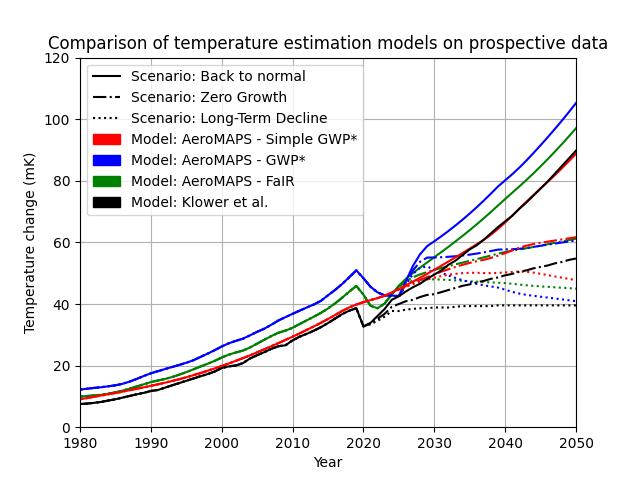

In [24]:
data_years_total = list(range(1940, 2101))

fig, ax = plt.subplots()
ax.plot(
    data_years_total,
    1000 * process4.data["climate_outputs"]["temperature_increase_from_aviation"],
    color="green",
    linestyle="-",
)
ax.plot(
    data_years_total,
    1000 * process5.data["climate_outputs"]["temperature_increase_from_aviation"],
    color="green",
    linestyle="-.",
)
ax.plot(
    data_years_total,
    1000 * process6.data["climate_outputs"]["temperature_increase_from_aviation"],
    color="green",
    linestyle=":",
)
ax.plot(
    data_years_total,
    1000 * process4b.data["climate_outputs"]["temperature_increase_from_aviation"],
    color="blue",
    linestyle="-",
)
ax.plot(
    data_years_total,
    1000 * process5b.data["climate_outputs"]["temperature_increase_from_aviation"],
    color="blue",
    linestyle="-.",
)
ax.plot(
    data_years_total,
    1000 * process6b.data["climate_outputs"]["temperature_increase_from_aviation"],
    color="blue",
    linestyle=":",
)
ax.plot(
    data_years_total,
    1000 * process4c.data["climate_outputs"]["temperature_increase_from_aviation"],
    color="red",
    linestyle="-",
)
ax.plot(
    data_years_total,
    1000 * process5c.data["climate_outputs"]["temperature_increase_from_aviation"],
    color="red",
    linestyle="-.",
)
ax.plot(
    data_years_total,
    1000 * process6c.data["climate_outputs"]["temperature_increase_from_aviation"],
    color="red",
    linestyle=":",
)
ax.plot(
    data_years_prospective,
    data_temperature_3,
    color="black",
    label="Scenario: Back to normal",
    linestyle="-",
)
ax.plot(
    data_years_prospective,
    data_temperature_0,
    color="black",
    label="Scenario: Zero Growth",
    linestyle="-.",
)
ax.plot(
    data_years_prospective,
    data_temperature_m25,
    color="black",
    label="Scenario: Long-Term Decline",
    linestyle=":",
)

handles, labels = ax.get_legend_handles_labels()
patch = mpatches.Patch(color='red', label='Model: AeroMAPS - Simple GWP*')
handles.append(patch) 
patch = mpatches.Patch(color='blue', label='Model: AeroMAPS - GWP*')
handles.append(patch) 
patch = mpatches.Patch(color='green', label='Model: AeroMAPS - FaIR')
handles.append(patch) 
patch = mpatches.Patch(color='black', label='Model: Klower et al.')
handles.append(patch) 

ax.set(
    xlabel="Year",
    ylabel="Temperature change (mK)",
    title="Comparison of temperature estimation models on prospective data",
)

ax.grid()
plt.xlim(1980, 2050)
plt.ylim(0, 120)
plt.legend(handles=handles)
plt.show()

## Sudden halt

In [25]:
# Create process
process7 = create_process(
    models=models_complex_improvedgwpstar,
    use_fleet_model=True,
    add_examples_aircraft_and_subcategory=False,
)

# Change end year
process7.parameters.end_year = 2100
process7.setup(add_examples_aircraft_and_subcategory=False)

# Climate models
process7.parameters.tcre_coefficient = 0.00045
process7.parameters.contrails_gwpstar_variation_duration = duration
process7.parameters.contrails_gwpstar_s_coefficient = 0.0
process7.parameters.nox_short_term_o3_increase_gwpstar_variation_duration = duration
process7.parameters.nox_short_term_o3_increase_gwpstar_s_coefficient = 0.0
process7.parameters.nox_long_term_o3_decrease_gwpstar_variation_duration = 20.0
process7.parameters.nox_long_term_o3_decrease_gwpstar_s_coefficient = 0.25
process7.parameters.nox_ch4_decrease_gwpstar_variation_duration = 20.0
process7.parameters.nox_ch4_decrease_gwpstar_s_coefficient = 0.25
process7.parameters.nox_stratospheric_water_vapor_decrease_gwpstar_variation_duration = 20.0
process7.parameters.nox_stratospheric_water_vapor_decrease_gwpstar_s_coefficient = 0.25
process7.parameters.soot_gwpstar_variation_duration = duration
process7.parameters.soot_gwpstar_s_coefficient = 0.0
process7.parameters.h2o_gwpstar_variation_duration = duration
process7.parameters.h2o_gwpstar_s_coefficient = 0.0
process7.parameters.sulfur_gwpstar_variation_duration = duration
process7.parameters.sulfur_gwpstar_s_coefficient = 0.0

# Scenario settings
process7.parameters.cagr_passenger_short_range_reference_periods = []
process7.parameters.cagr_passenger_short_range_reference_periods_values = [-99.99]
process7.parameters.cagr_passenger_medium_range_reference_periods = []
process7.parameters.cagr_passenger_medium_range_reference_periods_values = [-99.99]
process7.parameters.cagr_passenger_long_range_reference_periods = []
process7.parameters.cagr_passenger_long_range_reference_periods_values = [-99.99]
process7.parameters.cagr_freight_reference_periods = []
process7.parameters.cagr_freight_reference_periods_values = [-99.99]
process7.parameters.load_factor_end_year = 82.399312

In [26]:
# Create process
process7a = create_process(
    models=models_complex,
    use_fleet_model=True,
    add_examples_aircraft_and_subcategory=False,
)

# Change end year
process7a.parameters.end_year = 2100
process7a.setup(add_examples_aircraft_and_subcategory=False)

# Climate models
process7a.parameters.tcre_coefficient = 0.00045

# Scenario settings
process7a.parameters.cagr_passenger_short_range_reference_periods = []
process7a.parameters.cagr_passenger_short_range_reference_periods_values = [-99.99]
process7a.parameters.cagr_passenger_medium_range_reference_periods = []
process7a.parameters.cagr_passenger_medium_range_reference_periods_values = [-99.99]
process7a.parameters.cagr_passenger_long_range_reference_periods = []
process7a.parameters.cagr_passenger_long_range_reference_periods_values = [-99.99]
process7a.parameters.cagr_freight_reference_periods = []
process7a.parameters.cagr_freight_reference_periods_values = [-99.99]
process7a.parameters.load_factor_end_year = 82.399312

In [27]:
# Create process
process8 = create_process(
    models=models_complex_fair,
    use_fleet_model=True,
    add_examples_aircraft_and_subcategory=False,
)

# Change end year
process8.parameters.end_year = 2100
process8.setup(add_examples_aircraft_and_subcategory=False)

# Climate models
process8.parameters.nox_long_term_o3_decrease_gwpstar_variation_duration = 20.0
process8.parameters.nox_long_term_o3_decrease_gwpstar_s_coefficient = 0.25
process8.parameters.nox_ch4_decrease_gwpstar_variation_duration = 20.0
process8.parameters.nox_ch4_decrease_gwpstar_s_coefficient = 0.25
process8.parameters.nox_stratospheric_water_vapor_decrease_gwpstar_variation_duration = 20.0
process8.parameters.nox_stratospheric_water_vapor_decrease_gwpstar_s_coefficient = 0.25

# Scenario settings
process8.parameters.cagr_passenger_short_range_reference_periods = []
process8.parameters.cagr_passenger_short_range_reference_periods_values = [-99.99]
process8.parameters.cagr_passenger_medium_range_reference_periods = []
process8.parameters.cagr_passenger_medium_range_reference_periods_values = [-99.99]
process8.parameters.cagr_passenger_long_range_reference_periods = []
process8.parameters.cagr_passenger_long_range_reference_periods_values = [-99.99]
process8.parameters.cagr_freight_reference_periods = []
process8.parameters.cagr_freight_reference_periods_values = [-99.99]
process8.parameters.load_factor_end_year = 82.399312

In [28]:
process7.compute()
process7a.compute()
process8.compute()

C:\Users\t.planes\PycharmProjects\AeroMAPS\aeromaps\models\base.py:74: UserWarning: Warning Message - Model name: coal_cost - Warning on AeromapsInterpolationFunction: The last reference year for the interpolation is lower than end_year, the value associated to the last reference year is therefore used as a constant for the upper years.
  warnings.warn(
C:\Users\t.planes\PycharmProjects\AeroMAPS\aeromaps\models\base.py:74: UserWarning: Warning Message - Model name: coal_cost - Warning on AeromapsInterpolationFunction: The last reference year for the interpolation is lower than end_year, the value associated to the last reference year is therefore used as a constant for the upper years.
  warnings.warn(
C:\Users\t.planes\PycharmProjects\AeroMAPS\aeromaps\models\base.py:74: UserWarning: Warning Message - Model name: electrolyser_capex - Warning on AeromapsInterpolationFunction: The last reference year for the interpolation is lower than end_year, the value associated to the last referenc

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

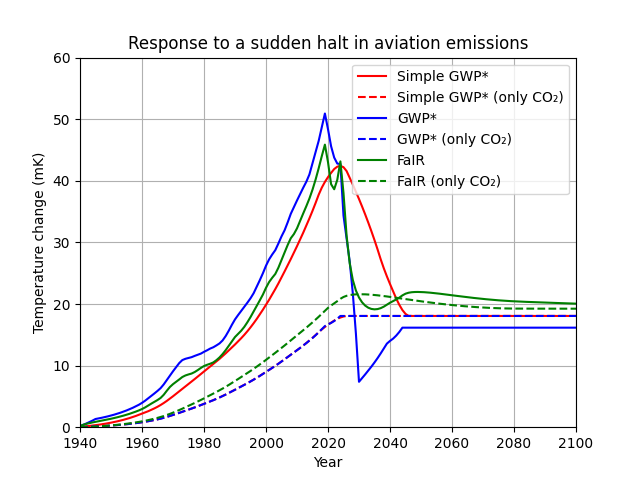

In [29]:
data_years_total = list(range(1940, 2101))

fig, ax = plt.subplots()
ax.plot(
    data_years_total,
    1000 * process7a.data["climate_outputs"]["temperature_increase_from_aviation"],
    color="red",
    label="Simple GWP*",
    linestyle="-",
)
ax.plot(
    data_years_total,
    1000 * process7a.data["climate_outputs"]["temperature_increase_from_co2_from_aviation"],
    color="red",
    label="Simple GWP* (only CO₂)",
    linestyle="--",
)
ax.plot(
    data_years_total,
    1000 * process7.data["climate_outputs"]["temperature_increase_from_aviation"],
    color="blue",
    label="GWP*",
    linestyle="-",
)
ax.plot(
    data_years_total,
    1000 * process7.data["climate_outputs"]["temperature_increase_from_co2_from_aviation"],
    color="blue",
    label="GWP* (only CO₂)",
    linestyle="--",
)
ax.plot(
    data_years_total,
    1000 * process8.data["climate_outputs"]["temperature_increase_from_aviation"],
    color="green",
    label="FaIR",
    linestyle="-",
)
ax.plot(
    data_years_total,
    1000 * process8.data["climate_outputs"]["temperature_increase_from_co2_from_aviation"],
    color="green",
    label="FaIR (only CO₂)",
    linestyle="--",
)

ax.set(
    xlabel="Year",
    ylabel="Temperature change (mK)",
    title="Response to a sudden halt in aviation emissions",
)

ax.grid()
plt.xlim(1940, 2100)
plt.ylim(0, 60)
plt.legend()
plt.show()

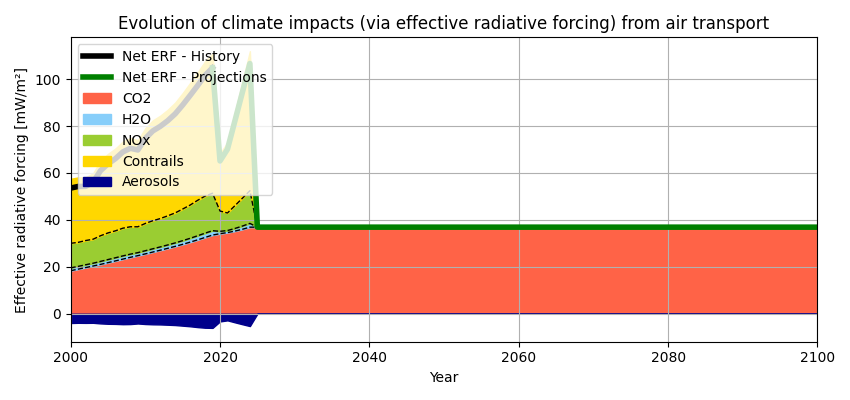

In [41]:
process8.plot("air_transport_climate_impacts", save=False)

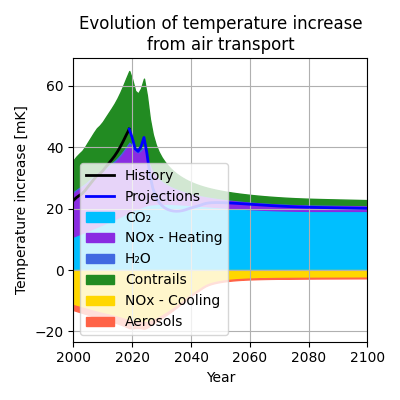

In [30]:
process8.plot("detailed_temperature_increase_from_air_transport", save=False)

## 3. Sensitivity analyses

In [31]:
# Climate sensitivity
contrails_choice = "Lee"
nox_choice = "Lee"
# Contrails
## Lee et al.
if contrails_choice == "Lee":
    process3.parameters.erf_coefficient_contrails = 1.058e-09
## Digby et al.
elif contrails_choice == "Digby":
    process3.parameters.erf_coefficient_contrails = 1.058e-09 * 8 / 57.4
# NOx
## Lee et al.
if nox_choice == "Lee":
    process3.parameters.erf_coefficient_nox_short_term_o3_increase = 34.4 * 1.35 * 0.88
    process3.parameters.erf_coefficient_nox_long_term_o3_decrease = -9.3 * 1.35 * 0.88 * 0.79
    process3.parameters.erf_coefficient_nox_ch4_decrease = -18.7 * 1.35 * 0.88 * 0.79
    process3.parameters.erf_coefficient_nox_stratospheric_water_vapor_decrease = (
        -2.8 * 1.35 * 0.88 * 0.79
    )
## Grewe et al.
elif nox_choice == "Grewe":
    process3.parameters.erf_coefficient_nox_short_term_o3_increase = 59.0
    process3.parameters.erf_coefficient_nox_long_term_o3_decrease = -4.1
    process3.parameters.erf_coefficient_nox_ch4_decrease = -12.3
    process3.parameters.erf_coefficient_nox_stratospheric_water_vapor_decrease = -1.5

## 4. Scenarios analyses

In [32]:
growth = -2

In [33]:
# Create process
process9 = create_process(
    models=models_complex_fair,
    use_fleet_model=True,
    add_examples_aircraft_and_subcategory=False,
)

# Change end year
process9.parameters.end_year = 2100
process9.setup(add_examples_aircraft_and_subcategory=False)

# Climate models
process9.parameters.nox_long_term_o3_decrease_gwpstar_variation_duration = 20.0
process9.parameters.nox_long_term_o3_decrease_gwpstar_s_coefficient = 0.25
process9.parameters.nox_ch4_decrease_gwpstar_variation_duration = 20.0
process9.parameters.nox_ch4_decrease_gwpstar_s_coefficient = 0.25
process9.parameters.nox_stratospheric_water_vapor_decrease_gwpstar_variation_duration = 20.0
process9.parameters.nox_stratospheric_water_vapor_decrease_gwpstar_s_coefficient = 0.25

# Scenario settings
process9.parameters.cagr_passenger_short_range_reference_periods = []
process9.parameters.cagr_passenger_short_range_reference_periods_values = [growth]
process9.parameters.cagr_passenger_medium_range_reference_periods = []
process9.parameters.cagr_passenger_medium_range_reference_periods_values = [growth]
process9.parameters.cagr_passenger_long_range_reference_periods = []
process9.parameters.cagr_passenger_long_range_reference_periods_values = [growth]
process9.parameters.cagr_freight_reference_periods = []
process9.parameters.cagr_freight_reference_periods_values = [growth]
process9.parameters.load_factor_end_year = 82.399312

In [34]:
# Create process
process10 = create_process(
    models=models_complex_fair,
    use_fleet_model=True,
    add_examples_aircraft_and_subcategory=False,
)

# Change end year
process10.parameters.end_year = 2100
process10.setup(add_examples_aircraft_and_subcategory=False)

# Climate models
process10.parameters.nox_long_term_o3_decrease_gwpstar_variation_duration = 20.0
process10.parameters.nox_long_term_o3_decrease_gwpstar_s_coefficient = 0.25
process10.parameters.nox_ch4_decrease_gwpstar_variation_duration = 20.0
process10.parameters.nox_ch4_decrease_gwpstar_s_coefficient = 0.25
process10.parameters.nox_stratospheric_water_vapor_decrease_gwpstar_variation_duration = 20.0
process10.parameters.nox_stratospheric_water_vapor_decrease_gwpstar_s_coefficient = 0.25

# Scenario settings
process10.parameters.cagr_passenger_short_range_reference_periods = []
process10.parameters.cagr_passenger_short_range_reference_periods_values = [growth]
process10.parameters.cagr_passenger_medium_range_reference_periods = []
process10.parameters.cagr_passenger_medium_range_reference_periods_values = [growth]
process10.parameters.cagr_passenger_long_range_reference_periods = []
process10.parameters.cagr_passenger_long_range_reference_periods_values = [growth]
process10.parameters.cagr_freight_reference_periods = []
process10.parameters.cagr_freight_reference_periods_values = [growth]
process10.parameters.load_factor_end_year = 82.399312
process10.parameters.biofuel_share_reference_years = [2020, 2030, 2040, 2050]
process10.parameters.biofuel_share_reference_years_values = [0.0, 0.0, 20.0, 50.0]
process10.parameters.electrofuel_share_reference_years = [2020, 2030, 2040, 2050]
process10.parameters.electrofuel_share_reference_years_values = [0.0, 5.0, 30.0, 50.0]
process10.parameters.biofuel_hefa_fog_share_reference_years = []
process10.parameters.biofuel_hefa_fog_share_reference_years_values = [0.0]
process10.parameters.biofuel_hefa_others_share_reference_years = []
process10.parameters.biofuel_hefa_others_share_reference_years_values = [0.0]
process10.parameters.biofuel_ft_others_share_reference_years = []
process10.parameters.biofuel_ft_others_share_reference_years_values = [100.0]
process10.parameters.biofuel_ft_msw_share_reference_years = []
process10.parameters.biofuel_ft_msw_share_reference_years_values = [0.0]
process10.parameters.electricity_emission_factor_reference_years = []
process10.parameters.electricity_emission_factor_reference_years_values = [10.0]

In [35]:
# Create process
process10l = create_process(
    models=models_complex_fair,
    use_fleet_model=True,
    add_examples_aircraft_and_subcategory=False,
)

# Change end year
process10l.parameters.end_year = 2100
process10l.setup(add_examples_aircraft_and_subcategory=False)

# Climate models
process10l.parameters.nox_long_term_o3_decrease_gwpstar_variation_duration = 20.0
process10l.parameters.nox_long_term_o3_decrease_gwpstar_s_coefficient = 0.25
process10l.parameters.nox_ch4_decrease_gwpstar_variation_duration = 20.0
process10l.parameters.nox_ch4_decrease_gwpstar_s_coefficient = 0.25
process10l.parameters.nox_stratospheric_water_vapor_decrease_gwpstar_variation_duration = 20.0
process10l.parameters.nox_stratospheric_water_vapor_decrease_gwpstar_s_coefficient = 0.25

# Scenario settings
process10l.parameters.cagr_passenger_short_range_reference_periods = []
process10l.parameters.cagr_passenger_short_range_reference_periods_values = [growth]
process10l.parameters.cagr_passenger_medium_range_reference_periods = []
process10l.parameters.cagr_passenger_medium_range_reference_periods_values = [growth]
process10l.parameters.cagr_passenger_long_range_reference_periods = []
process10l.parameters.cagr_passenger_long_range_reference_periods_values = [growth]
process10l.parameters.cagr_freight_reference_periods = []
process10l.parameters.cagr_freight_reference_periods_values = [growth]
process10l.parameters.load_factor_end_year = 82.399312
process10l.parameters.biofuel_share_reference_years = [2020, 2030, 2040, 2050]
process10l.parameters.biofuel_share_reference_years_values = [0.0, 0.0, 20.0, 50.0]
process10l.parameters.electrofuel_share_reference_years = [2020, 2030, 2040, 2050]
process10l.parameters.electrofuel_share_reference_years_values = [0.0, 5.0, 30.0, 50.0]
process10l.parameters.biofuel_hefa_fog_share_reference_years = []
process10l.parameters.biofuel_hefa_fog_share_reference_years_values = [0.0]
process10l.parameters.biofuel_hefa_others_share_reference_years = []
process10l.parameters.biofuel_hefa_others_share_reference_years_values = [0.0]
process10l.parameters.biofuel_ft_others_share_reference_years = []
process10l.parameters.biofuel_ft_others_share_reference_years_values = [100.0]
process10l.parameters.biofuel_ft_msw_share_reference_years = []
process10l.parameters.biofuel_ft_msw_share_reference_years_values = [0.0]
process10l.parameters.electricity_emission_factor_reference_years = []
process10l.parameters.electricity_emission_factor_reference_years_values = [10.0]
process10l.parameters.erf_coefficient_contrails = 1.058e-09 * 17/57.4

In [36]:
# Create process
process10h = create_process(
    models=models_complex_fair,
    use_fleet_model=True,
    add_examples_aircraft_and_subcategory=False,
)

# Change end year
process10h.parameters.end_year = 2100
process10h.setup(add_examples_aircraft_and_subcategory=False)

# Climate models
process10h.parameters.nox_long_term_o3_decrease_gwpstar_variation_duration = 20.0
process10h.parameters.nox_long_term_o3_decrease_gwpstar_s_coefficient = 0.25
process10h.parameters.nox_ch4_decrease_gwpstar_variation_duration = 20.0
process10h.parameters.nox_ch4_decrease_gwpstar_s_coefficient = 0.25
process10h.parameters.nox_stratospheric_water_vapor_decrease_gwpstar_variation_duration = 20.0
process10h.parameters.nox_stratospheric_water_vapor_decrease_gwpstar_s_coefficient = 0.25

# Scenario settings
process10h.parameters.cagr_passenger_short_range_reference_periods = []
process10h.parameters.cagr_passenger_short_range_reference_periods_values = [growth]
process10h.parameters.cagr_passenger_medium_range_reference_periods = []
process10h.parameters.cagr_passenger_medium_range_reference_periods_values = [growth]
process10h.parameters.cagr_passenger_long_range_reference_periods = []
process10h.parameters.cagr_passenger_long_range_reference_periods_values = [growth]
process10h.parameters.cagr_freight_reference_periods = []
process10h.parameters.cagr_freight_reference_periods_values = [growth]
process10h.parameters.load_factor_end_year = 82.399312
process10h.parameters.biofuel_share_reference_years = [2020, 2030, 2040, 2050]
process10h.parameters.biofuel_share_reference_years_values = [0.0, 0.0, 20.0, 50.0]
process10h.parameters.electrofuel_share_reference_years = [2020, 2030, 2040, 2050]
process10h.parameters.electrofuel_share_reference_years_values = [0.0, 5.0, 30.0, 50.0]
process10h.parameters.biofuel_hefa_fog_share_reference_years = []
process10h.parameters.biofuel_hefa_fog_share_reference_years_values = [0.0]
process10h.parameters.biofuel_hefa_others_share_reference_years = []
process10h.parameters.biofuel_hefa_others_share_reference_years_values = [0.0]
process10h.parameters.biofuel_ft_others_share_reference_years = []
process10h.parameters.biofuel_ft_others_share_reference_years_values = [100.0]
process10h.parameters.biofuel_ft_msw_share_reference_years = []
process10h.parameters.biofuel_ft_msw_share_reference_years_values = [0.0]
process10h.parameters.electricity_emission_factor_reference_years = []
process10h.parameters.electricity_emission_factor_reference_years_values = [10.0]
process10h.parameters.erf_coefficient_contrails = 1.058e-09 * 98/57.4

In [37]:
# Create process
process11 = create_process(
    models=models_complex_fair,
    use_fleet_model=True,
    add_examples_aircraft_and_subcategory=False,
)

# Change end year
process11.parameters.end_year = 2100
process11.setup(add_examples_aircraft_and_subcategory=False)

# Climate models
process11.parameters.nox_long_term_o3_decrease_gwpstar_variation_duration = 20.0
process11.parameters.nox_long_term_o3_decrease_gwpstar_s_coefficient = 0.25
process11.parameters.nox_ch4_decrease_gwpstar_variation_duration = 20.0
process11.parameters.nox_ch4_decrease_gwpstar_s_coefficient = 0.25
process11.parameters.nox_stratospheric_water_vapor_decrease_gwpstar_variation_duration = 20.0
process11.parameters.nox_stratospheric_water_vapor_decrease_gwpstar_s_coefficient = 0.25

# Scenario settings
process11.parameters.cagr_passenger_short_range_reference_periods = []
process11.parameters.cagr_passenger_short_range_reference_periods_values = [growth]
process11.parameters.cagr_passenger_medium_range_reference_periods = []
process11.parameters.cagr_passenger_medium_range_reference_periods_values = [growth]
process11.parameters.cagr_passenger_long_range_reference_periods = []
process11.parameters.cagr_passenger_long_range_reference_periods_values = [growth]
process11.parameters.cagr_freight_reference_periods = []
process11.parameters.cagr_freight_reference_periods_values = [growth]
process11.parameters.load_factor_end_year = 82.399312
process11.parameters.operations_contrails_final_gain = 80  # [%]
process11.parameters.operations_contrails_start_year = 2030
process11.parameters.operations_contrails_duration = 10.0
process11.parameters.operations_contrails_final_overconsumption = 2.0

In [38]:
# Create process
process11l = create_process(
    models=models_complex_fair,
    use_fleet_model=True,
    add_examples_aircraft_and_subcategory=False,
)

# Change end year
process11l.parameters.end_year = 2100
process11l.setup(add_examples_aircraft_and_subcategory=False)

# Climate models
process11l.parameters.nox_long_term_o3_decrease_gwpstar_variation_duration = 20.0
process11l.parameters.nox_long_term_o3_decrease_gwpstar_s_coefficient = 0.25
process11l.parameters.nox_ch4_decrease_gwpstar_variation_duration = 20.0
process11l.parameters.nox_ch4_decrease_gwpstar_s_coefficient = 0.25
process11l.parameters.nox_stratospheric_water_vapor_decrease_gwpstar_variation_duration = 20.0
process11l.parameters.nox_stratospheric_water_vapor_decrease_gwpstar_s_coefficient = 0.25

# Scenario settings
process11l.parameters.cagr_passenger_short_range_reference_periods = []
process11l.parameters.cagr_passenger_short_range_reference_periods_values = [growth]
process11l.parameters.cagr_passenger_medium_range_reference_periods = []
process11l.parameters.cagr_passenger_medium_range_reference_periods_values = [growth]
process11l.parameters.cagr_passenger_long_range_reference_periods = []
process11l.parameters.cagr_passenger_long_range_reference_periods_values = [growth]
process11l.parameters.cagr_freight_reference_periods = []
process11l.parameters.cagr_freight_reference_periods_values = [growth]
process11l.parameters.load_factor_end_year = 82.399312
process11l.parameters.operations_contrails_final_gain = 80  # [%]
process11l.parameters.operations_contrails_start_year = 2030
process11l.parameters.operations_contrails_duration = 10.0
process11l.parameters.operations_contrails_final_overconsumption = 2.0
process11l.parameters.erf_coefficient_contrails = 1.058e-09 * 17/57.4

In [39]:
# Create process
process11h = create_process(
    models=models_complex_fair,
    use_fleet_model=True,
    add_examples_aircraft_and_subcategory=False,
)

# Change end year
process11h.parameters.end_year = 2100
process11h.setup(add_examples_aircraft_and_subcategory=False)

# Climate models
process11h.parameters.nox_long_term_o3_decrease_gwpstar_variation_duration = 20.0
process11h.parameters.nox_long_term_o3_decrease_gwpstar_s_coefficient = 0.25
process11h.parameters.nox_ch4_decrease_gwpstar_variation_duration = 20.0
process11h.parameters.nox_ch4_decrease_gwpstar_s_coefficient = 0.25
process11h.parameters.nox_stratospheric_water_vapor_decrease_gwpstar_variation_duration = 20.0
process11h.parameters.nox_stratospheric_water_vapor_decrease_gwpstar_s_coefficient = 0.25

# Scenario settings
process11h.parameters.cagr_passenger_short_range_reference_periods = []
process11h.parameters.cagr_passenger_short_range_reference_periods_values = [growth]
process11h.parameters.cagr_passenger_medium_range_reference_periods = []
process11h.parameters.cagr_passenger_medium_range_reference_periods_values = [growth]
process11h.parameters.cagr_passenger_long_range_reference_periods = []
process11h.parameters.cagr_passenger_long_range_reference_periods_values = [growth]
process11h.parameters.cagr_freight_reference_periods = []
process11h.parameters.cagr_freight_reference_periods_values = [growth]
process11h.parameters.load_factor_end_year = 82.399312
process11h.parameters.operations_contrails_final_gain = 80  # [%]
process11h.parameters.operations_contrails_start_year = 2030
process11h.parameters.operations_contrails_duration = 10.0
process11h.parameters.operations_contrails_final_overconsumption = 2.0
process11h.parameters.erf_coefficient_contrails = 1.058e-09 * 98/57.4

In [40]:
# Create process
process12 = create_process(
    models=models_complex_fair,
    use_fleet_model=True,
    add_examples_aircraft_and_subcategory=False,
)

# Change end year
process12.parameters.end_year = 2100
process12.setup(add_examples_aircraft_and_subcategory=False)

# Climate models
process12.parameters.nox_long_term_o3_decrease_gwpstar_variation_duration = 20.0
process12.parameters.nox_long_term_o3_decrease_gwpstar_s_coefficient = 0.25
process12.parameters.nox_ch4_decrease_gwpstar_variation_duration = 20.0
process12.parameters.nox_ch4_decrease_gwpstar_s_coefficient = 0.25
process12.parameters.nox_stratospheric_water_vapor_decrease_gwpstar_variation_duration = 20.0
process12.parameters.nox_stratospheric_water_vapor_decrease_gwpstar_s_coefficient = 0.25

# Scenario settings
process12.parameters.cagr_passenger_short_range_reference_periods = []
process12.parameters.cagr_passenger_short_range_reference_periods_values = [growth]
process12.parameters.cagr_passenger_medium_range_reference_periods = []
process12.parameters.cagr_passenger_medium_range_reference_periods_values = [growth]
process12.parameters.cagr_passenger_long_range_reference_periods = []
process12.parameters.cagr_passenger_long_range_reference_periods_values = [growth]
process12.parameters.cagr_freight_reference_periods = []
process12.parameters.cagr_freight_reference_periods_values = [growth]
process12.parameters.load_factor_end_year = 82.399312
process12.parameters.operations_contrails_final_gain = 80  # [%]
process12.parameters.operations_contrails_start_year = 2030
process12.parameters.operations_contrails_duration = 10.0
process12.parameters.operations_contrails_final_overconsumption = 2.0
process12.parameters.biofuel_share_reference_years = [2020, 2030, 2040, 2050]
process12.parameters.biofuel_share_reference_years_values = [0.0, 0.0, 20.0, 50.0]
process12.parameters.electrofuel_share_reference_years = [2020, 2030, 2040, 2050]
process12.parameters.electrofuel_share_reference_years_values = [0.0, 5.0, 30.0, 50.0]
process12.parameters.biofuel_hefa_fog_share_reference_years = []
process12.parameters.biofuel_hefa_fog_share_reference_years_values = [0.0]
process12.parameters.biofuel_hefa_others_share_reference_years = []
process12.parameters.biofuel_hefa_others_share_reference_years_values = [0.0]
process12.parameters.biofuel_ft_others_share_reference_years = []
process12.parameters.biofuel_ft_others_share_reference_years_values = [100.0]
process12.parameters.biofuel_ft_msw_share_reference_years = []
process12.parameters.biofuel_ft_msw_share_reference_years_values = [0.0]
process12.parameters.electricity_emission_factor_reference_years = []
process12.parameters.electricity_emission_factor_reference_years_values = [10.0]

In [41]:
# Create process
process13 = create_process(
    models=models_complex_fair,
    use_fleet_model=True,
    add_examples_aircraft_and_subcategory=False,
)

# Change end year
process13.parameters.end_year = 2100
process13.setup(add_examples_aircraft_and_subcategory=False)

# Climate models
process13.parameters.nox_long_term_o3_decrease_gwpstar_variation_duration = 20.0
process13.parameters.nox_long_term_o3_decrease_gwpstar_s_coefficient = 0.25
process13.parameters.nox_ch4_decrease_gwpstar_variation_duration = 20.0
process13.parameters.nox_ch4_decrease_gwpstar_s_coefficient = 0.25
process13.parameters.nox_stratospheric_water_vapor_decrease_gwpstar_variation_duration = 20.0
process13.parameters.nox_stratospheric_water_vapor_decrease_gwpstar_s_coefficient = 0.25

# Scenario settings
process13.parameters.cagr_passenger_short_range_reference_periods = [2019,2041,2061,2081,2100]
process13.parameters.cagr_passenger_short_range_reference_periods_values = [3.0, -0.2, -1.5, -99.9]
process13.parameters.cagr_passenger_medium_range_reference_periods = [2019,2041,2061,2081,2100]
process13.parameters.cagr_passenger_medium_range_reference_periods_values = [3.0, -0.2, -1.5, -99.9]
process13.parameters.cagr_passenger_long_range_reference_periods = [2019,2041,2061,2081,2100]
process13.parameters.cagr_passenger_long_range_reference_periods_values = [3.0, -0.2, -1.5, -99.9]
process13.parameters.cagr_freight_reference_periods = [2019,2041,2061,2081,2100]
process13.parameters.cagr_freight_reference_periods_values = [3.0, -0.2, -1.5, -99.9]
process13.parameters.load_factor_end_year = 82.399312

In [42]:
process9.compute()
process10.compute()
process11.compute()
process10l.compute()
process10h.compute()
process11l.compute()
process11h.compute()
process12.compute()
process13.compute()

C:\Users\t.planes\PycharmProjects\AeroMAPS\aeromaps\models\base.py:74: UserWarning: Warning Message - Model name: coal_cost - Warning on AeromapsInterpolationFunction: The last reference year for the interpolation is lower than end_year, the value associated to the last reference year is therefore used as a constant for the upper years.
  warnings.warn(
C:\Users\t.planes\PycharmProjects\AeroMAPS\aeromaps\models\base.py:74: UserWarning: Warning Message - Model name: coal_cost - Warning on AeromapsInterpolationFunction: The last reference year for the interpolation is lower than end_year, the value associated to the last reference year is therefore used as a constant for the upper years.
  warnings.warn(
C:\Users\t.planes\PycharmProjects\AeroMAPS\aeromaps\models\base.py:74: UserWarning: Warning Message - Model name: electrolyser_capex - Warning on AeromapsInterpolationFunction: The last reference year for the interpolation is lower than end_year, the value associated to the last referenc

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

C:\Users\t.planes\PycharmProjects\AeroMAPS\aeromaps\models\base.py:74: UserWarning: Warning Message - Model name: dropin_fuel_distribution - Warning on AeromapsInterpolationFunction: The last reference year for the interpolation is lower than end_year, the value associated to the last reference year is therefore used as a constant for the upper years.
  warnings.warn(
C:\Users\t.planes\PycharmProjects\AeroMAPS\aeromaps\models\base.py:74: UserWarning: Warning Message - Model name: dropin_fuel_distribution - Warning on AeromapsInterpolationFunction: The last reference year for the interpolation is lower than end_year, the value associated to the last reference year is therefore used as a constant for the upper years.
  warnings.warn(
C:\Users\t.planes\PycharmProjects\AeroMAPS\aeromaps\models\base.py:74: UserWarning: Warning Message - Model name: coal_cost - Warning on AeromapsInterpolationFunction: The last reference year for the interpolation is lower than end_year, the value associated

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

C:\Users\t.planes\PycharmProjects\AeroMAPS\aeromaps\models\base.py:74: UserWarning: Warning Message - Model name: coal_cost - Warning on AeromapsInterpolationFunction: The last reference year for the interpolation is lower than end_year, the value associated to the last reference year is therefore used as a constant for the upper years.
  warnings.warn(
C:\Users\t.planes\PycharmProjects\AeroMAPS\aeromaps\models\base.py:74: UserWarning: Warning Message - Model name: coal_cost - Warning on AeromapsInterpolationFunction: The last reference year for the interpolation is lower than end_year, the value associated to the last reference year is therefore used as a constant for the upper years.
  warnings.warn(
C:\Users\t.planes\PycharmProjects\AeroMAPS\aeromaps\models\base.py:74: UserWarning: Warning Message - Model name: electrolyser_capex - Warning on AeromapsInterpolationFunction: The last reference year for the interpolation is lower than end_year, the value associated to the last referenc

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

C:\Users\t.planes\PycharmProjects\AeroMAPS\aeromaps\models\base.py:74: UserWarning: Warning Message - Model name: dropin_fuel_distribution - Warning on AeromapsInterpolationFunction: The last reference year for the interpolation is lower than end_year, the value associated to the last reference year is therefore used as a constant for the upper years.
  warnings.warn(
C:\Users\t.planes\PycharmProjects\AeroMAPS\aeromaps\models\base.py:74: UserWarning: Warning Message - Model name: dropin_fuel_distribution - Warning on AeromapsInterpolationFunction: The last reference year for the interpolation is lower than end_year, the value associated to the last reference year is therefore used as a constant for the upper years.
  warnings.warn(
C:\Users\t.planes\PycharmProjects\AeroMAPS\aeromaps\models\base.py:74: UserWarning: Warning Message - Model name: coal_cost - Warning on AeromapsInterpolationFunction: The last reference year for the interpolation is lower than end_year, the value associated

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

C:\Users\t.planes\PycharmProjects\AeroMAPS\aeromaps\models\base.py:74: UserWarning: Warning Message - Model name: dropin_fuel_distribution - Warning on AeromapsInterpolationFunction: The last reference year for the interpolation is lower than end_year, the value associated to the last reference year is therefore used as a constant for the upper years.
  warnings.warn(
C:\Users\t.planes\PycharmProjects\AeroMAPS\aeromaps\models\base.py:74: UserWarning: Warning Message - Model name: dropin_fuel_distribution - Warning on AeromapsInterpolationFunction: The last reference year for the interpolation is lower than end_year, the value associated to the last reference year is therefore used as a constant for the upper years.
  warnings.warn(
C:\Users\t.planes\PycharmProjects\AeroMAPS\aeromaps\models\base.py:74: UserWarning: Warning Message - Model name: coal_cost - Warning on AeromapsInterpolationFunction: The last reference year for the interpolation is lower than end_year, the value associated

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

C:\Users\t.planes\PycharmProjects\AeroMAPS\aeromaps\models\base.py:74: UserWarning: Warning Message - Model name: coal_cost - Warning on AeromapsInterpolationFunction: The last reference year for the interpolation is lower than end_year, the value associated to the last reference year is therefore used as a constant for the upper years.
  warnings.warn(
C:\Users\t.planes\PycharmProjects\AeroMAPS\aeromaps\models\base.py:74: UserWarning: Warning Message - Model name: coal_cost - Warning on AeromapsInterpolationFunction: The last reference year for the interpolation is lower than end_year, the value associated to the last reference year is therefore used as a constant for the upper years.
  warnings.warn(
C:\Users\t.planes\PycharmProjects\AeroMAPS\aeromaps\models\base.py:74: UserWarning: Warning Message - Model name: electrolyser_capex - Warning on AeromapsInterpolationFunction: The last reference year for the interpolation is lower than end_year, the value associated to the last referenc

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

C:\Users\t.planes\PycharmProjects\AeroMAPS\aeromaps\models\base.py:74: UserWarning: Warning Message - Model name: coal_cost - Warning on AeromapsInterpolationFunction: The last reference year for the interpolation is lower than end_year, the value associated to the last reference year is therefore used as a constant for the upper years.
  warnings.warn(
C:\Users\t.planes\PycharmProjects\AeroMAPS\aeromaps\models\base.py:74: UserWarning: Warning Message - Model name: coal_cost - Warning on AeromapsInterpolationFunction: The last reference year for the interpolation is lower than end_year, the value associated to the last reference year is therefore used as a constant for the upper years.
  warnings.warn(
C:\Users\t.planes\PycharmProjects\AeroMAPS\aeromaps\models\base.py:74: UserWarning: Warning Message - Model name: electrolyser_capex - Warning on AeromapsInterpolationFunction: The last reference year for the interpolation is lower than end_year, the value associated to the last referenc

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

C:\Users\t.planes\PycharmProjects\AeroMAPS\aeromaps\models\base.py:74: UserWarning: Warning Message - Model name: dropin_fuel_distribution - Warning on AeromapsInterpolationFunction: The last reference year for the interpolation is lower than end_year, the value associated to the last reference year is therefore used as a constant for the upper years.
  warnings.warn(
C:\Users\t.planes\PycharmProjects\AeroMAPS\aeromaps\models\base.py:74: UserWarning: Warning Message - Model name: dropin_fuel_distribution - Warning on AeromapsInterpolationFunction: The last reference year for the interpolation is lower than end_year, the value associated to the last reference year is therefore used as a constant for the upper years.
  warnings.warn(
C:\Users\t.planes\PycharmProjects\AeroMAPS\aeromaps\models\base.py:74: UserWarning: Warning Message - Model name: coal_cost - Warning on AeromapsInterpolationFunction: The last reference year for the interpolation is lower than end_year, the value associated

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

C:\Users\t.planes\PycharmProjects\AeroMAPS\aeromaps\models\base.py:74: UserWarning: Warning Message - Model name: coal_cost - Warning on AeromapsInterpolationFunction: The last reference year for the interpolation is lower than end_year, the value associated to the last reference year is therefore used as a constant for the upper years.
  warnings.warn(
C:\Users\t.planes\PycharmProjects\AeroMAPS\aeromaps\models\base.py:74: UserWarning: Warning Message - Model name: coal_cost - Warning on AeromapsInterpolationFunction: The last reference year for the interpolation is lower than end_year, the value associated to the last reference year is therefore used as a constant for the upper years.
  warnings.warn(
C:\Users\t.planes\PycharmProjects\AeroMAPS\aeromaps\models\base.py:74: UserWarning: Warning Message - Model name: electrolyser_capex - Warning on AeromapsInterpolationFunction: The last reference year for the interpolation is lower than end_year, the value associated to the last referenc

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

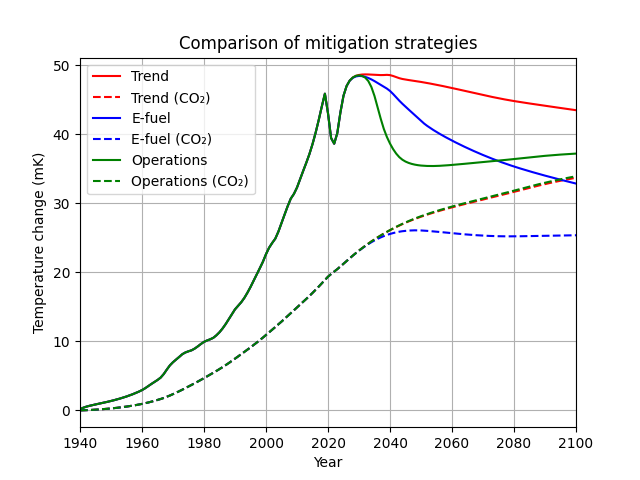

In [43]:
data_years_total = list(range(1940, 2101))

fig, ax = plt.subplots()

ax.plot(
    data_years_total,
    1000 * process9.data["climate_outputs"]["temperature_increase_from_aviation"],
    color="red",
    label="Trend",
    linestyle="-",
)

ax.plot(
    data_years_total,
    1000 * process9.data["climate_outputs"]["temperature_increase_from_co2_from_aviation"],
    color="red",
    label="Trend (CO₂)",
    linestyle="--",
)

ax.plot(
    data_years_total,
    1000 * process10.data["climate_outputs"]["temperature_increase_from_aviation"],
    color="blue",
    label="E-fuel",
    linestyle="-",
)

ax.plot(
    data_years_total,
    1000 * process10.data["climate_outputs"]["temperature_increase_from_co2_from_aviation"],
    color="blue",
    label="E-fuel (CO₂)",
    linestyle="--",
)

ax.plot(
    data_years_total,
    1000 * process11.data["climate_outputs"]["temperature_increase_from_aviation"],
    color="green",
    label="Operations",
    linestyle="-",
)

ax.plot(
    data_years_total,
    1000 * process11.data["climate_outputs"]["temperature_increase_from_co2_from_aviation"],
    color="green",
    label="Operations (CO₂)",
    linestyle="--",
)

ax.set(
    xlabel="Year",
    ylabel="Temperature change (mK)",
    title="Comparison of mitigation strategies",
)

ax.grid()
plt.xlim(1940, 2100)
plt.legend()
plt.show()

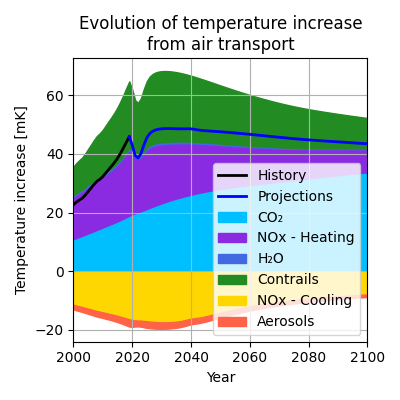

In [44]:
process9.plot("detailed_temperature_increase_from_air_transport", save=False)

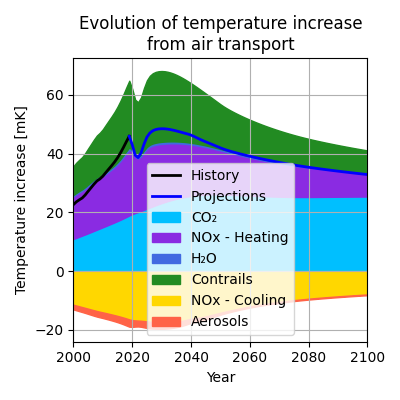

In [45]:
process10.plot("detailed_temperature_increase_from_air_transport", save=False)

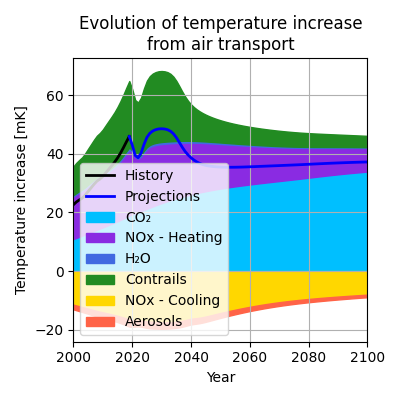

In [46]:
process11.plot("detailed_temperature_increase_from_air_transport", save=False)

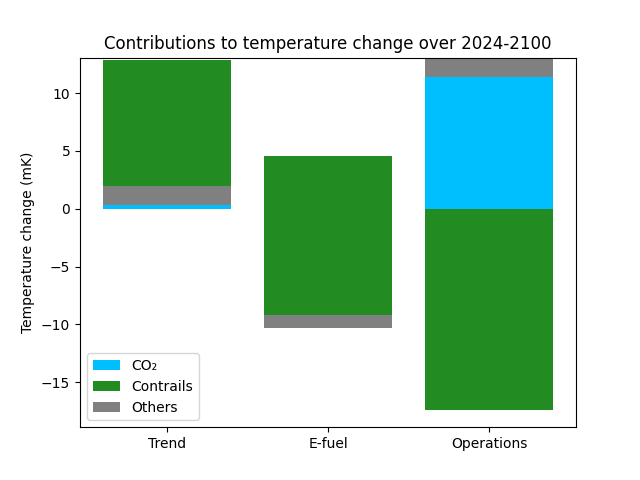

In [47]:
fig, ax = plt.subplots()
barWidth = 0.85
legend = ["Trend", "E-fuel", "Operations"]
ax.bar(
    legend[0],
    1000
    * (
        process9.data["climate_outputs"]["temperature_increase_from_co2_from_aviation"][2100]
        - process9.data["climate_outputs"]["temperature_increase_from_co2_from_aviation"][2024]
    ),
    color="deepskyblue",
)
ax.bar(
    legend[1],
    1000
    * (
        process10.data["climate_outputs"]["temperature_increase_from_co2_from_aviation"][2100]
        - process10.data["climate_outputs"]["temperature_increase_from_co2_from_aviation"][2024]
    ),
    color="deepskyblue",
)
ax.bar(
    legend[2],
    1000
    * (
        process11.data["climate_outputs"]["temperature_increase_from_co2_from_aviation"][2100]
        - process11.data["climate_outputs"]["temperature_increase_from_co2_from_aviation"][2024]
    ),
    color="deepskyblue",
    label="CO₂",
)

ax.bar(
    legend[0],
    1000
    * (
        process9.data["climate_outputs"]["temperature_increase_from_contrails_from_aviation"][2100]
        - process9.data["climate_outputs"]["temperature_increase_from_contrails_from_aviation"][
            2024
        ]
    ),
    bottom=1000
    * (
        process9.data["climate_outputs"]["temperature_increase_from_co2_from_aviation"][2100]
        - process9.data["climate_outputs"]["temperature_increase_from_co2_from_aviation"][2024]
    ),
    color="forestgreen",
)
ax.bar(
    legend[1],
    1000
    * (
        process10.data["climate_outputs"]["temperature_increase_from_contrails_from_aviation"][2100]
        - process10.data["climate_outputs"]["temperature_increase_from_contrails_from_aviation"][
            2024
        ]
    ),
    bottom=1000
    * (
        process10.data["climate_outputs"]["temperature_increase_from_co2_from_aviation"][2100]
        - process10.data["climate_outputs"]["temperature_increase_from_co2_from_aviation"][2024]
    ),
    color="forestgreen",
)
ax.bar(
    legend[2],
    1000
    * (
        process11.data["climate_outputs"]["temperature_increase_from_contrails_from_aviation"][2100]
        - process11.data["climate_outputs"]["temperature_increase_from_contrails_from_aviation"][
            2024
        ]
    ),
    color="forestgreen",
    label="Contrails",
)

ax.bar(
    legend[0],
    1000
    * (
        process9.data["climate_outputs"]["temperature_increase_from_non_co2_from_aviation"][2100]
        - process9.data["climate_outputs"]["temperature_increase_from_non_co2_from_aviation"][2024]
    )
    - 1000
    * (
        process9.data["climate_outputs"]["temperature_increase_from_contrails_from_aviation"][2100]
        - process9.data["climate_outputs"]["temperature_increase_from_contrails_from_aviation"][
            2024
        ]
    ),
    bottom=1000
    * (
        process9.data["climate_outputs"]["temperature_increase_from_co2_from_aviation"][2100]
        - process9.data["climate_outputs"]["temperature_increase_from_co2_from_aviation"][2024]
    )
    + 1000
    * (
        process9.data["climate_outputs"]["temperature_increase_from_contrails_from_aviation"][2100]
        - process9.data["climate_outputs"]["temperature_increase_from_contrails_from_aviation"][
            2024
        ]
    ),
    color="grey",
)
ax.bar(
    legend[1],
    1000
    * (
        process10.data["climate_outputs"]["temperature_increase_from_non_co2_from_aviation"][2100]
        - process10.data["climate_outputs"]["temperature_increase_from_non_co2_from_aviation"][2024]
    )
    - 1000
    * (
        process10.data["climate_outputs"]["temperature_increase_from_contrails_from_aviation"][2100]
        - process10.data["climate_outputs"]["temperature_increase_from_contrails_from_aviation"][
            2024
        ]
    ),
    bottom=1000
    * (
        process10.data["climate_outputs"]["temperature_increase_from_co2_from_aviation"][2100]
        - process10.data["climate_outputs"]["temperature_increase_from_co2_from_aviation"][2024]
    )
    + 1000
    * (
        process10.data["climate_outputs"]["temperature_increase_from_contrails_from_aviation"][2100]
        - process10.data["climate_outputs"]["temperature_increase_from_contrails_from_aviation"][
            2024
        ]
    ),
    color="grey",
)
ax.bar(
    legend[2],
    1000
    * (
        process11.data["climate_outputs"]["temperature_increase_from_non_co2_from_aviation"][2100]
        - process11.data["climate_outputs"]["temperature_increase_from_non_co2_from_aviation"][2024]
    )
    - 1000
    * (
        process11.data["climate_outputs"]["temperature_increase_from_contrails_from_aviation"][2100]
        - process11.data["climate_outputs"]["temperature_increase_from_contrails_from_aviation"][
            2024
        ]
    ),
    bottom=1000
    * (
        process11.data["climate_outputs"]["temperature_increase_from_co2_from_aviation"][2100]
        - process11.data["climate_outputs"]["temperature_increase_from_co2_from_aviation"][2024]
    ),
    color="grey",
    label="Others",
)

ax.set(
    ylabel="Temperature change (mK)",
    title="Contributions to temperature change over 2024-2100",
)

plt.legend()

## Climate metrics

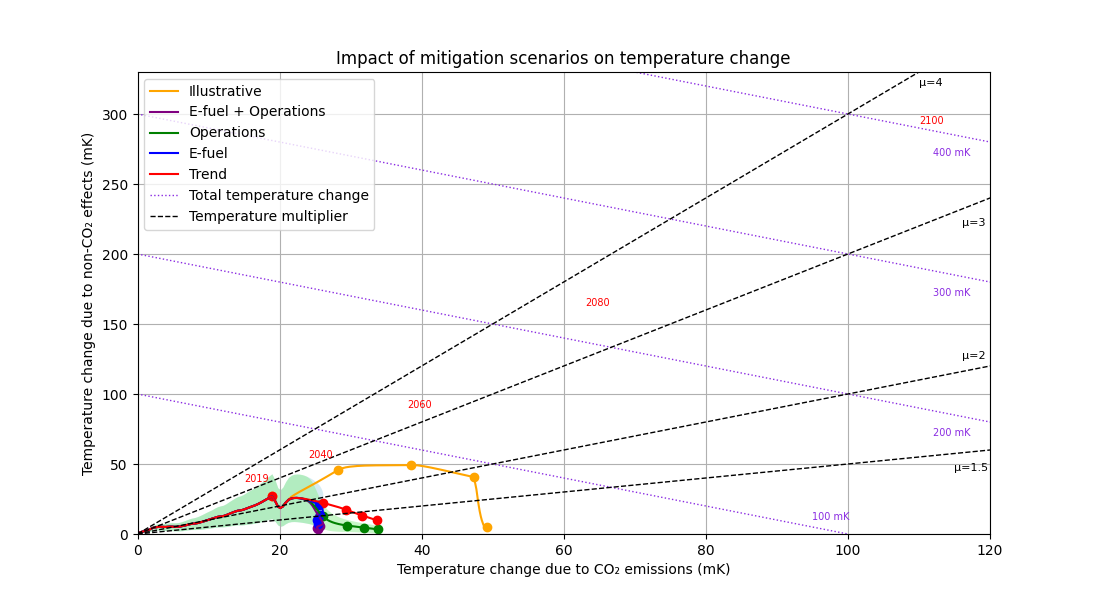

In [48]:
fig, ax = plt.subplots(figsize=(11,6))

ax.fill_between(1000 * process10.data["climate_outputs"]["temperature_increase_from_co2_from_aviation"],
                1000 * process10l.data["climate_outputs"]["temperature_increase_from_non_co2_from_aviation"], 
                1000 * process10h.data["climate_outputs"]["temperature_increase_from_non_co2_from_aviation"], 
                color="lightblue", alpha=.5, linewidth=0)

ax.fill_between(1000 * process11.data["climate_outputs"]["temperature_increase_from_co2_from_aviation"],
                1000 * process11l.data["climate_outputs"]["temperature_increase_from_non_co2_from_aviation"], 
                1000 * process11h.data["climate_outputs"]["temperature_increase_from_non_co2_from_aviation"], 
                color="lightgreen", alpha=.5, linewidth=0)


ax.plot(
    1000 * process13.data["climate_outputs"]["temperature_increase_from_co2_from_aviation"],
    1000 * process13.data["climate_outputs"]["temperature_increase_from_non_co2_from_aviation"],
    color="orange",
    label="Illustrative",
    linestyle="-",
)
ax.scatter(
    1000 * process13.data["climate_outputs"]["temperature_increase_from_co2_from_aviation"][2019],
    1000 * process13.data["climate_outputs"]["temperature_increase_from_non_co2_from_aviation"][2019],
    color="orange",
)
ax.scatter(
    1000 * process13.data["climate_outputs"]["temperature_increase_from_co2_from_aviation"][2040],
    1000 * process13.data["climate_outputs"]["temperature_increase_from_non_co2_from_aviation"][2040],
    color="orange",
)
ax.scatter(
    1000 * process13.data["climate_outputs"]["temperature_increase_from_co2_from_aviation"][2060],
    1000 * process13.data["climate_outputs"]["temperature_increase_from_non_co2_from_aviation"][2060],
    color="orange",
)
ax.scatter(
    1000 * process13.data["climate_outputs"]["temperature_increase_from_co2_from_aviation"][2080],
    1000 * process13.data["climate_outputs"]["temperature_increase_from_non_co2_from_aviation"][2080],
    color="orange",
)
ax.scatter(
    1000 * process13.data["climate_outputs"]["temperature_increase_from_co2_from_aviation"][2100],
    1000 * process13.data["climate_outputs"]["temperature_increase_from_non_co2_from_aviation"][2100],
    color="orange",
)

ax.plot(
    1000 * process12.data["climate_outputs"]["temperature_increase_from_co2_from_aviation"],
    1000 * process12.data["climate_outputs"]["temperature_increase_from_non_co2_from_aviation"],
    color="purple",
    label="E-fuel + Operations",
    linestyle="-",
)
ax.scatter(
    1000 * process12.data["climate_outputs"]["temperature_increase_from_co2_from_aviation"][2040],
    1000 * process12.data["climate_outputs"]["temperature_increase_from_non_co2_from_aviation"][2040],
    color="purple",
)
ax.scatter(
    1000 * process12.data["climate_outputs"]["temperature_increase_from_co2_from_aviation"][2060],
    1000 * process12.data["climate_outputs"]["temperature_increase_from_non_co2_from_aviation"][2060],
    color="purple",
)
ax.scatter(
    1000 * process12.data["climate_outputs"]["temperature_increase_from_co2_from_aviation"][2080],
    1000 * process12.data["climate_outputs"]["temperature_increase_from_non_co2_from_aviation"][2080],
    color="purple",
)
ax.scatter(
    1000 * process12.data["climate_outputs"]["temperature_increase_from_co2_from_aviation"][2100],
    1000 * process12.data["climate_outputs"]["temperature_increase_from_non_co2_from_aviation"][2100],
    color="purple",
)

ax.plot(
    1000 * process11.data["climate_outputs"]["temperature_increase_from_co2_from_aviation"],
    1000 * process11.data["climate_outputs"]["temperature_increase_from_non_co2_from_aviation"],
    color="green",
    label="Operations",
    linestyle="-",
)
ax.scatter(
    1000 * process11.data["climate_outputs"]["temperature_increase_from_co2_from_aviation"][2040],
    1000 * process11.data["climate_outputs"]["temperature_increase_from_non_co2_from_aviation"][2040],
    color="green",
)
ax.scatter(
    1000 * process11.data["climate_outputs"]["temperature_increase_from_co2_from_aviation"][2060],
    1000 * process11.data["climate_outputs"]["temperature_increase_from_non_co2_from_aviation"][2060],
    color="green",
)
ax.scatter(
    1000 * process11.data["climate_outputs"]["temperature_increase_from_co2_from_aviation"][2080],
    1000 * process11.data["climate_outputs"]["temperature_increase_from_non_co2_from_aviation"][2080],
    color="green",
)
ax.scatter(
    1000 * process11.data["climate_outputs"]["temperature_increase_from_co2_from_aviation"][2100],
    1000 * process11.data["climate_outputs"]["temperature_increase_from_non_co2_from_aviation"][2100],
    color="green",
)

ax.plot(
    1000 * process10.data["climate_outputs"]["temperature_increase_from_co2_from_aviation"],
    1000 * process10.data["climate_outputs"]["temperature_increase_from_non_co2_from_aviation"],
    color="blue",
    label="E-fuel",
    linestyle="-",
)
ax.scatter(
    1000 * process10.data["climate_outputs"]["temperature_increase_from_co2_from_aviation"][2040],
    1000 * process10.data["climate_outputs"]["temperature_increase_from_non_co2_from_aviation"][2040],
    color="blue",
)
ax.scatter(
    1000 * process10.data["climate_outputs"]["temperature_increase_from_co2_from_aviation"][2060],
    1000 * process10.data["climate_outputs"]["temperature_increase_from_non_co2_from_aviation"][2060],
    color="blue",
)
ax.scatter(
    1000 * process10.data["climate_outputs"]["temperature_increase_from_co2_from_aviation"][2080],
    1000 * process10.data["climate_outputs"]["temperature_increase_from_non_co2_from_aviation"][2080],
    color="blue",
)
ax.scatter(
    1000 * process10.data["climate_outputs"]["temperature_increase_from_co2_from_aviation"][2100],
    1000 * process10.data["climate_outputs"]["temperature_increase_from_non_co2_from_aviation"][2100],
    color="blue",
)

ax.plot(
    1000 * process9.data["climate_outputs"]["temperature_increase_from_co2_from_aviation"],
    1000 * process9.data["climate_outputs"]["temperature_increase_from_non_co2_from_aviation"],
    color="red",
    label="Trend",
    linestyle="-",
)
ax.scatter(
    1000 * process9.data["climate_outputs"]["temperature_increase_from_co2_from_aviation"][2019],
    1000 * process9.data["climate_outputs"]["temperature_increase_from_non_co2_from_aviation"][2019],
    color="red",
)
ax.scatter(
    1000 * process9.data["climate_outputs"]["temperature_increase_from_co2_from_aviation"][2040],
    1000 * process9.data["climate_outputs"]["temperature_increase_from_non_co2_from_aviation"][2040],
    color="red",
)
ax.scatter(
    1000 * process9.data["climate_outputs"]["temperature_increase_from_co2_from_aviation"][2060],
    1000 * process9.data["climate_outputs"]["temperature_increase_from_non_co2_from_aviation"][2060],
    color="red",
)
ax.scatter(
    1000 * process9.data["climate_outputs"]["temperature_increase_from_co2_from_aviation"][2080],
    1000 * process9.data["climate_outputs"]["temperature_increase_from_non_co2_from_aviation"][2080],
    color="red",
)
ax.scatter(
    1000 * process9.data["climate_outputs"]["temperature_increase_from_co2_from_aviation"][2100],
    1000 * process9.data["climate_outputs"]["temperature_increase_from_non_co2_from_aviation"][2100],
    color="red",
)

ax.plot(
    [0, 100],
    [100,0],
    color="blueviolet",
    linestyle=":",
    linewidth=1,
    label="Total temperature change"
)
plt.text(95, 10, "100 mK", fontsize=7, color="blueviolet")
ax.plot(
    [0, 200],
    [200,0],
    color="blueviolet",
    linestyle=":",
    linewidth=1
)
plt.text(112, 70, "200 mK", fontsize=7, color="blueviolet")
ax.plot(
    [0, 300],
    [300,0],
    color="blueviolet",
    linestyle=":",
    linewidth=1
)
plt.text(112, 170, "300 mK", fontsize=7, color="blueviolet")
ax.plot(
    [0, 400],
    [400,0],
    color="blueviolet",
    linestyle=":",
    linewidth=1
)
plt.text(112, 270, "400 mK", fontsize=7, color="blueviolet")

ax.plot(
    [0, 150],
    [0,150/2],
    color="black",
    linestyle="--",
    linewidth=1,
    label="Temperature multiplier"
)
plt.text(115, 45, "μ=1.5", fontsize=8, color="black")
ax.plot(
    [0, 150],
    [0,150],
    color="black",
    linestyle="--",
    linewidth=1,
)
plt.text(116, 125, "μ=2", fontsize=8, color="black")
ax.plot(
    [0, 150],
    [0,150*2],
    color="black",
    linestyle="--",
    linewidth=1,
)
plt.text(116, 220, "μ=3", fontsize=8, color="black")
ax.plot(
    [0, 150],
    [0,150*3],
    color="black",
    linestyle="--",
    linewidth=1,
)
plt.text(110, 320, "μ=4", fontsize=8, color="black")

plt.text(15, 37, "2019", fontsize=7, color="red")
plt.text(24, 54, "2040", fontsize=7, color="red")
plt.text(38, 90, "2060", fontsize=7, color="red")
plt.text(63, 163, "2080", fontsize=7, color="red")
plt.text(110, 293, "2100", fontsize=7, color="red")

ax.set(
    xlabel="Temperature change due to CO₂ emissions (mK)",
    ylabel="Temperature change due to non-CO₂ effects (mK)",
    title="Impact of mitigation scenarios on temperature change",
)

ax.grid()
plt.xlim(0, 120)
plt.ylim(0, 330)

plt.legend()
plt.show()

In [49]:
def metric_equivalent_emissions(metrics, contrails_kilometers, nox_emissions, h2o_emissions, soot_emissions, sulfur_emissions):
    metric_contrails = metrics[0]
    contrails_metric_equivalent_emissions = metric_contrails * contrails_kilometers
    metric_nox = metrics[1]
    nox_metric_equivalent_emissions = metric_nox * nox_emissions
    metric_h2o = metrics[2]
    h2o_metric_equivalent_emissions = metric_h2o * h2o_emissions
    metric_soot = metrics[3]
    soot_metric_equivalent_emissions = metric_soot * soot_emissions
    metric_sulfur = metrics[4]
    sulfur_metric_equivalent_emissions = metric_sulfur * sulfur_emissions
    non_co2_metric_equivalent_emissions = contrails_metric_equivalent_emissions + nox_metric_equivalent_emissions + h2o_metric_equivalent_emissions + soot_metric_equivalent_emissions + sulfur_metric_equivalent_emissions
    return non_co2_metric_equivalent_emissions

def metric_multiplicative_coefficient(co2_emissions, non_co2_metric_equivalent_emissions):
    return (co2_emissions+non_co2_metric_equivalent_emissions)/co2_emissions

metrics_gwp20 = [39, 619*14/46, 0.22, 4288, -832]
metrics_gwp50 = [18, 205*14/46, 0.10, 2018, -392]
metrics_gwp100 = [11, 114*14/46, 0.06, 1166, -226]
metrics_gtp20 = [11, -222*14/46, 0.07, 1245, -241]
metrics_gtp50 = [1.8, -69*14/46, 0.01, 195, -38]
metrics_gtp100 = [1.5, 13*14/46, 0.008, 161, -31]

In [50]:
co2_emissions = process9.data["climate_outputs"]["co2_emissions"]
nox_emissions = process9.data["climate_outputs"]["nox_emissions"]
h2o_emissions = process9.data["climate_outputs"]["h2o_emissions"]
soot_emissions = process9.data["climate_outputs"]["soot_emissions"]
sulfur_emissions = process9.data["climate_outputs"]["sulfur_emissions"]
contrails_kilometers = process9.data["climate_outputs"]["total_aircraft_distance"]/10**9
for k in range(2000, 2101):
    contrails_kilometers.loc[k] = process9.data["climate_outputs"]["total_aircraft_distance"][k]/10**9 * (1 - process9.data["vector_outputs"]["operations_contrails_gain"][k] / 100) * process9.data["vector_outputs"]["fuel_effect_correction_contrails"][k]

gwp20_multiplicative_coefficient9 = metric_multiplicative_coefficient(co2_emissions, non_co2_metric_equivalent_emissions = metric_equivalent_emissions(metrics_gwp20, contrails_kilometers, nox_emissions, h2o_emissions, soot_emissions, sulfur_emissions))
gwp50_multiplicative_coefficient9 = metric_multiplicative_coefficient(co2_emissions, non_co2_metric_equivalent_emissions = metric_equivalent_emissions(metrics_gwp50, contrails_kilometers, nox_emissions, h2o_emissions, soot_emissions, sulfur_emissions))
gwp100_multiplicative_coefficient9 = metric_multiplicative_coefficient(co2_emissions, non_co2_metric_equivalent_emissions = metric_equivalent_emissions(metrics_gwp100, contrails_kilometers, nox_emissions, h2o_emissions, soot_emissions, sulfur_emissions))
gtp20_multiplicative_coefficient9 = metric_multiplicative_coefficient(co2_emissions, non_co2_metric_equivalent_emissions = metric_equivalent_emissions(metrics_gtp20, contrails_kilometers, nox_emissions, h2o_emissions, soot_emissions, sulfur_emissions))
gtp50_multiplicative_coefficient9 = metric_multiplicative_coefficient(co2_emissions, non_co2_metric_equivalent_emissions = metric_equivalent_emissions(metrics_gtp50, contrails_kilometers, nox_emissions, h2o_emissions, soot_emissions, sulfur_emissions))
gtp100_multiplicative_coefficient9 = metric_multiplicative_coefficient(co2_emissions, non_co2_metric_equivalent_emissions = metric_equivalent_emissions(metrics_gtp100, contrails_kilometers, nox_emissions, h2o_emissions, soot_emissions, sulfur_emissions))

In [51]:
co2_emissions = process10.data["climate_outputs"]["co2_emissions"]
nox_emissions = process10.data["climate_outputs"]["nox_emissions"]
h2o_emissions = process10.data["climate_outputs"]["h2o_emissions"]
soot_emissions = process10.data["climate_outputs"]["soot_emissions"]
sulfur_emissions = process10.data["climate_outputs"]["sulfur_emissions"]
contrails_kilometers = process10.data["climate_outputs"]["total_aircraft_distance"]/10**9
for k in range(2000, 2101):
    contrails_kilometers.loc[k] = process10.data["climate_outputs"]["total_aircraft_distance"][k]/10**9 * (1 - process11.data["vector_outputs"]["operations_contrails_gain"][k] / 100) * process11.data["vector_outputs"]["fuel_effect_correction_contrails"][k]

gwp20_multiplicative_coefficient10 = metric_multiplicative_coefficient(co2_emissions, non_co2_metric_equivalent_emissions = metric_equivalent_emissions(metrics_gwp20, contrails_kilometers, nox_emissions, h2o_emissions, soot_emissions, sulfur_emissions))
gwp50_multiplicative_coefficient10 = metric_multiplicative_coefficient(co2_emissions, non_co2_metric_equivalent_emissions = metric_equivalent_emissions(metrics_gwp50, contrails_kilometers, nox_emissions, h2o_emissions, soot_emissions, sulfur_emissions))
gwp100_multiplicative_coefficient10 = metric_multiplicative_coefficient(co2_emissions, non_co2_metric_equivalent_emissions = metric_equivalent_emissions(metrics_gwp100, contrails_kilometers, nox_emissions, h2o_emissions, soot_emissions, sulfur_emissions))
gtp20_multiplicative_coefficient10 = metric_multiplicative_coefficient(co2_emissions, non_co2_metric_equivalent_emissions = metric_equivalent_emissions(metrics_gtp20, contrails_kilometers, nox_emissions, h2o_emissions, soot_emissions, sulfur_emissions))
gtp50_multiplicative_coefficient10 = metric_multiplicative_coefficient(co2_emissions, non_co2_metric_equivalent_emissions = metric_equivalent_emissions(metrics_gtp50, contrails_kilometers, nox_emissions, h2o_emissions, soot_emissions, sulfur_emissions))
gtp100_multiplicative_coefficient10 = metric_multiplicative_coefficient(co2_emissions, non_co2_metric_equivalent_emissions = metric_equivalent_emissions(metrics_gtp100, contrails_kilometers, nox_emissions, h2o_emissions, soot_emissions, sulfur_emissions))

In [52]:
co2_emissions = process11.data["climate_outputs"]["co2_emissions"]
nox_emissions = process11.data["climate_outputs"]["nox_emissions"]
h2o_emissions = process11.data["climate_outputs"]["h2o_emissions"]
soot_emissions = process11.data["climate_outputs"]["soot_emissions"]
sulfur_emissions = process11.data["climate_outputs"]["sulfur_emissions"]
contrails_kilometers = process11.data["climate_outputs"]["total_aircraft_distance"]/10**9
for k in range(2000, 2101):
    contrails_kilometers.loc[k] = process11.data["climate_outputs"]["total_aircraft_distance"][k]/10**9 * (1 - process11.data["vector_outputs"]["operations_contrails_gain"][k] / 100) * process11.data["vector_outputs"]["fuel_effect_correction_contrails"][k]

gwp20_multiplicative_coefficient11 = metric_multiplicative_coefficient(co2_emissions, non_co2_metric_equivalent_emissions = metric_equivalent_emissions(metrics_gwp20, contrails_kilometers, nox_emissions, h2o_emissions, soot_emissions, sulfur_emissions))
gwp50_multiplicative_coefficient11 = metric_multiplicative_coefficient(co2_emissions, non_co2_metric_equivalent_emissions = metric_equivalent_emissions(metrics_gwp50, contrails_kilometers, nox_emissions, h2o_emissions, soot_emissions, sulfur_emissions))
gwp100_multiplicative_coefficient11 = metric_multiplicative_coefficient(co2_emissions, non_co2_metric_equivalent_emissions = metric_equivalent_emissions(metrics_gwp100, contrails_kilometers, nox_emissions, h2o_emissions, soot_emissions, sulfur_emissions))
gtp20_multiplicative_coefficient11 = metric_multiplicative_coefficient(co2_emissions, non_co2_metric_equivalent_emissions = metric_equivalent_emissions(metrics_gtp20, contrails_kilometers, nox_emissions, h2o_emissions, soot_emissions, sulfur_emissions))
gtp50_multiplicative_coefficient11 = metric_multiplicative_coefficient(co2_emissions, non_co2_metric_equivalent_emissions = metric_equivalent_emissions(metrics_gtp50, contrails_kilometers, nox_emissions, h2o_emissions, soot_emissions, sulfur_emissions))
gtp100_multiplicative_coefficient11 = metric_multiplicative_coefficient(co2_emissions, non_co2_metric_equivalent_emissions = metric_equivalent_emissions(metrics_gtp100, contrails_kilometers, nox_emissions, h2o_emissions, soot_emissions, sulfur_emissions))

In [53]:
co2_emissions = process13.data["climate_outputs"]["co2_emissions"]
nox_emissions = process13.data["climate_outputs"]["nox_emissions"]
h2o_emissions = process13.data["climate_outputs"]["h2o_emissions"]
soot_emissions = process13.data["climate_outputs"]["soot_emissions"]
sulfur_emissions = process13.data["climate_outputs"]["sulfur_emissions"]
contrails_kilometers = process13.data["climate_outputs"]["total_aircraft_distance"]/10**9
for k in range(2000, 2101):
    contrails_kilometers.loc[k] = process13.data["climate_outputs"]["total_aircraft_distance"][k]/10**9 * (1 - process13.data["vector_outputs"]["operations_contrails_gain"][k] / 100) * process13.data["vector_outputs"]["fuel_effect_correction_contrails"][k]

gwp20_multiplicative_coefficient13 = metric_multiplicative_coefficient(co2_emissions, non_co2_metric_equivalent_emissions = metric_equivalent_emissions(metrics_gwp20, contrails_kilometers, nox_emissions, h2o_emissions, soot_emissions, sulfur_emissions))
gwp50_multiplicative_coefficient13 = metric_multiplicative_coefficient(co2_emissions, non_co2_metric_equivalent_emissions = metric_equivalent_emissions(metrics_gwp50, contrails_kilometers, nox_emissions, h2o_emissions, soot_emissions, sulfur_emissions))
gwp100_multiplicative_coefficient13 = metric_multiplicative_coefficient(co2_emissions, non_co2_metric_equivalent_emissions = metric_equivalent_emissions(metrics_gwp100, contrails_kilometers, nox_emissions, h2o_emissions, soot_emissions, sulfur_emissions))
gtp20_multiplicative_coefficient13 = metric_multiplicative_coefficient(co2_emissions, non_co2_metric_equivalent_emissions = metric_equivalent_emissions(metrics_gtp20, contrails_kilometers, nox_emissions, h2o_emissions, soot_emissions, sulfur_emissions))
gtp50_multiplicative_coefficient13 = metric_multiplicative_coefficient(co2_emissions, non_co2_metric_equivalent_emissions = metric_equivalent_emissions(metrics_gtp50, contrails_kilometers, nox_emissions, h2o_emissions, soot_emissions, sulfur_emissions))
gtp100_multiplicative_coefficient13 = metric_multiplicative_coefficient(co2_emissions, non_co2_metric_equivalent_emissions = metric_equivalent_emissions(metrics_gtp100, contrails_kilometers, nox_emissions, h2o_emissions, soot_emissions, sulfur_emissions))

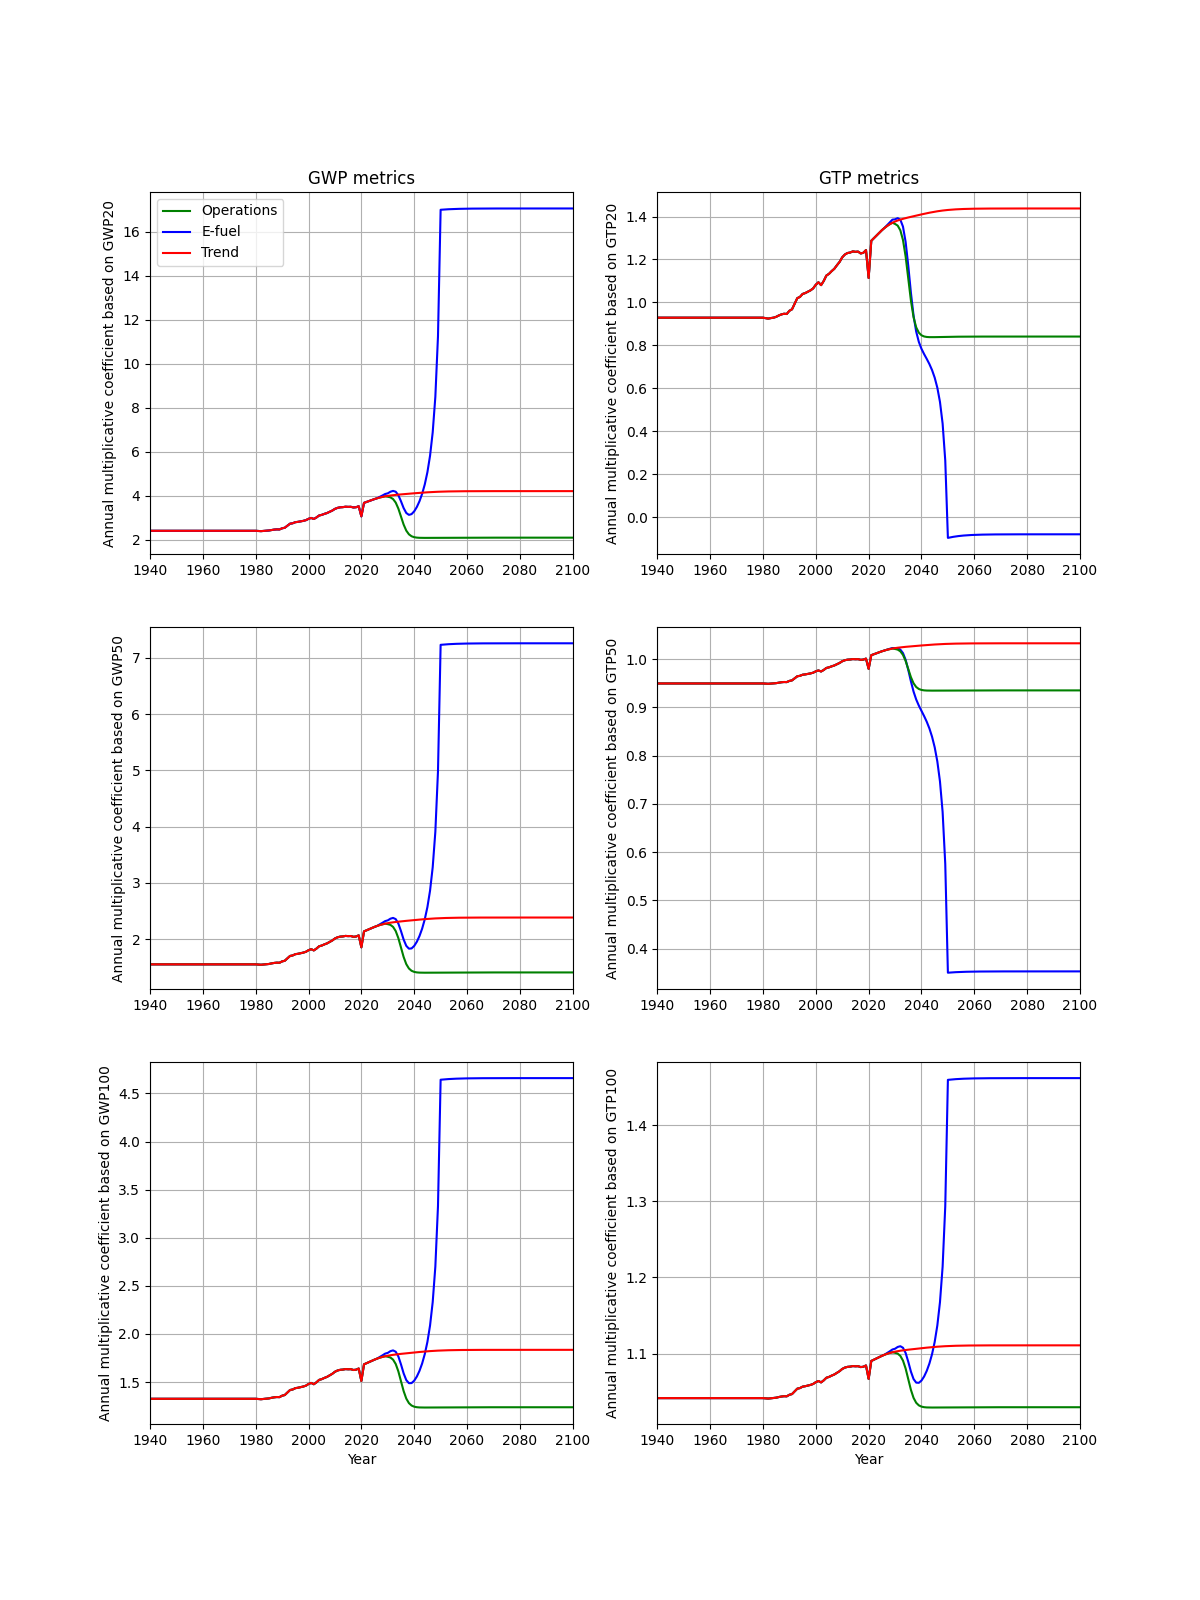

In [54]:
fig, axs = plt.subplots(3,2, figsize=(12,16))

axs[0,0].plot(
    data_years_total,
    gwp20_multiplicative_coefficient11,
    color="green",
    label="Operations",
    linestyle="-",
)
axs[0,0].plot(
    data_years_total,
    gwp20_multiplicative_coefficient10,
    color="blue",
    label="E-fuel",
    linestyle="-",
)
axs[0,0].plot(
    data_years_total,
    gwp20_multiplicative_coefficient9,
    color="red",
    label="Trend",
    linestyle="-",
)
axs[0,0].set(
    ylabel="Annual multiplicative coefficient based on GWP20",
    title="GWP metrics"
)

axs[0,1].plot(
    data_years_total,
    gtp20_multiplicative_coefficient10,
    color="blue",
    linestyle="-",
)
axs[0,1].plot(
    data_years_total,
    gtp20_multiplicative_coefficient11,
    color="green",
    linestyle="-",
)
axs[0,1].plot(
    data_years_total,
    gtp20_multiplicative_coefficient9,
    color="red",
    linestyle="-",
)
axs[0,1].set(
    ylabel="Annual multiplicative coefficient based on GTP20",
    title="GTP metrics"
)
axs[0,0].legend()

axs[1,0].plot(
    data_years_total,
    gwp50_multiplicative_coefficient10,
    color="blue",
    linestyle="-",
)
axs[1,0].plot(
    data_years_total,
    gwp50_multiplicative_coefficient11,
    color="green",
    linestyle="-",
)
axs[1,0].plot(
    data_years_total,
    gwp50_multiplicative_coefficient9,
    color="red",
    linestyle="-",
)
axs[1,0].set(
    ylabel="Annual multiplicative coefficient based on GWP50",
)
plt.xlim(1940, 2100)

axs[1,1].plot(
    data_years_total,
    gtp50_multiplicative_coefficient10,
    color="blue",
    linestyle="-",
)
axs[1,1].plot(
    data_years_total,
    gtp50_multiplicative_coefficient11,
    color="green",
    linestyle="-",
)
axs[1,1].plot(
    data_years_total,
    gtp50_multiplicative_coefficient9,
    color="red",
    linestyle="-",
)
axs[1,1].set(
    ylabel="Annual multiplicative coefficient based on GTP50",
)
plt.xlim(1940, 2100)

axs[2,0].plot(
    data_years_total,
    gwp100_multiplicative_coefficient10,
    color="blue",
    linestyle="-",
)
axs[2,0].plot(
    data_years_total,
    gwp100_multiplicative_coefficient11,
    color="green",
    linestyle="-",
)
axs[2,0].plot(
    data_years_total,
    gwp100_multiplicative_coefficient9,
    color="red",
    linestyle="-",
)
axs[2,0].set(
    xlabel="Year",
    ylabel="Annual multiplicative coefficient based on GWP100",
)
plt.xlim(1940, 2100)

axs[2,1].plot(
    data_years_total,
    gtp100_multiplicative_coefficient10,
    color="blue",
    linestyle="-",
)
axs[2,1].plot(
    data_years_total,
    gtp100_multiplicative_coefficient11,
    color="green",
    linestyle="-",
)
axs[2,1].plot(
    data_years_total,
    gtp100_multiplicative_coefficient9,
    color="red",
    linestyle="-",
)
axs[2,1].set(
    xlabel="Year",
    ylabel="Annual multiplicative coefficient based on GTP100",
)

axs[0,0].grid()
axs[0,1].grid()
axs[1,0].grid()
axs[1,1].grid()
axs[2,0].grid()
axs[2,1].grid()

axs[0,0].set_xlim(1940,2100)
axs[0,1].set_xlim(1940,2100)
axs[1,0].set_xlim(1940,2100)
axs[1,1].set_xlim(1940,2100)
axs[2,0].set_xlim(1940,2100)
axs[2,1].set_xlim(1940,2100)

plt.show()

In [55]:
# Create process
process9improve = create_process(
    models=models_complex_improvedgwpstar,
    use_fleet_model=True,
    add_examples_aircraft_and_subcategory=False,
)

# Change end year
process9improve.parameters.end_year = 2100
process9improve.setup(add_examples_aircraft_and_subcategory=False)

# Climate models
process9improve.parameters.tcre_coefficient = 0.00045
process9improve.parameters.contrails_gwpstar_variation_duration = 1.0
process9improve.parameters.contrails_gwpstar_s_coefficient = 0.0
process9improve.parameters.nox_short_term_o3_increase_gwpstar_variation_duration = 1.0
process9improve.parameters.nox_short_term_o3_increase_gwpstar_s_coefficient = 0.0
process9improve.parameters.nox_long_term_o3_decrease_gwpstar_variation_duration = 20.0
process9improve.parameters.nox_long_term_o3_decrease_gwpstar_s_coefficient = 0.25
process9improve.parameters.nox_ch4_decrease_gwpstar_variation_duration = 20.0
process9improve.parameters.nox_ch4_decrease_gwpstar_s_coefficient = 0.25
process9improve.parameters.nox_stratospheric_water_vapor_decrease_gwpstar_variation_duration = 20.0
process9improve.parameters.nox_stratospheric_water_vapor_decrease_gwpstar_s_coefficient = 0.25
process9improve.parameters.soot_gwpstar_variation_duration = 1.0
process9improve.parameters.soot_gwpstar_s_coefficient = 0.0
process9improve.parameters.h2o_gwpstar_variation_duration = 1.0
process9improve.parameters.h2o_gwpstar_s_coefficient = 0.0
process9improve.parameters.sulfur_gwpstar_variation_duration = 1.0
process9improve.parameters.sulfur_gwpstar_s_coefficient = 0.0

# Scenario settings
process9improve.parameters.cagr_passenger_short_range_reference_periods = []
process9improve.parameters.cagr_passenger_short_range_reference_periods_values = [growth]
process9improve.parameters.cagr_passenger_medium_range_reference_periods = []
process9improve.parameters.cagr_passenger_medium_range_reference_periods_values = [growth]
process9improve.parameters.cagr_passenger_long_range_reference_periods = []
process9improve.parameters.cagr_passenger_long_range_reference_periods_values = [growth]
process9improve.parameters.cagr_freight_reference_periods = []
process9improve.parameters.cagr_freight_reference_periods_values = [growth]
process9improve.parameters.load_factor_end_year = 82.399312

In [56]:
# Create process
process10improve = create_process(
    models=models_complex_improvedgwpstar,
    use_fleet_model=True,
    add_examples_aircraft_and_subcategory=False,
)

# Change end year
process10improve.parameters.end_year = 2100
process10improve.setup(add_examples_aircraft_and_subcategory=False)

# Climate models
process10improve.parameters.tcre_coefficient = 0.00045
process10improve.parameters.contrails_gwpstar_variation_duration = 1.0
process10improve.parameters.contrails_gwpstar_s_coefficient = 0.0
process10improve.parameters.nox_short_term_o3_increase_gwpstar_variation_duration = 1.0
process10improve.parameters.nox_short_term_o3_increase_gwpstar_s_coefficient = 0.0
process10improve.parameters.nox_long_term_o3_decrease_gwpstar_variation_duration = 20.0
process10improve.parameters.nox_long_term_o3_decrease_gwpstar_s_coefficient = 0.25
process10improve.parameters.nox_ch4_decrease_gwpstar_variation_duration = 20.0
process10improve.parameters.nox_ch4_decrease_gwpstar_s_coefficient = 0.25
process10improve.parameters.nox_stratospheric_water_vapor_decrease_gwpstar_variation_duration = 20.0
process10improve.parameters.nox_stratospheric_water_vapor_decrease_gwpstar_s_coefficient = 0.25
process10improve.parameters.soot_gwpstar_variation_duration = 1.0
process10improve.parameters.soot_gwpstar_s_coefficient = 0.0
process10improve.parameters.h2o_gwpstar_variation_duration = 1.0
process10improve.parameters.h2o_gwpstar_s_coefficient = 0.0
process10improve.parameters.sulfur_gwpstar_variation_duration = 1.0
process10improve.parameters.sulfur_gwpstar_s_coefficient = 0.0

# Scenario settings
process10improve.parameters.cagr_passenger_short_range_reference_periods = []
process10improve.parameters.cagr_passenger_short_range_reference_periods_values = [growth]
process10improve.parameters.cagr_passenger_medium_range_reference_periods = []
process10improve.parameters.cagr_passenger_medium_range_reference_periods_values = [growth]
process10improve.parameters.cagr_passenger_long_range_reference_periods = []
process10improve.parameters.cagr_passenger_long_range_reference_periods_values = [growth]
process10improve.parameters.cagr_freight_reference_periods = []
process10improve.parameters.cagr_freight_reference_periods_values = [growth]
process10improve.parameters.load_factor_end_year = 82.399312
process10improve.parameters.biofuel_share_reference_years = [2020, 2030, 2040, 2050]
process10improve.parameters.biofuel_share_reference_years_values = [0.0, 0.0, 20.0, 50.0]
process10improve.parameters.electrofuel_share_reference_years = [2020, 2030, 2040, 2050]
process10improve.parameters.electrofuel_share_reference_years_values = [0.0, 5.0, 30.0, 50.0]
process10improve.parameters.biofuel_hefa_fog_share_reference_years = []
process10improve.parameters.biofuel_hefa_fog_share_reference_years_values = [0.0]
process10improve.parameters.biofuel_hefa_others_share_reference_years = []
process10improve.parameters.biofuel_hefa_others_share_reference_years_values = [0.0]
process10improve.parameters.biofuel_ft_others_share_reference_years = []
process10improve.parameters.biofuel_ft_others_share_reference_years_values = [100.0]
process10improve.parameters.biofuel_ft_msw_share_reference_years = []
process10improve.parameters.biofuel_ft_msw_share_reference_years_values = [0.0]
process10improve.parameters.electricity_emission_factor_reference_years = []
process10improve.parameters.electricity_emission_factor_reference_years_values = [10.0]

In [57]:
# Create process
process11improve = create_process(
    models=models_complex_improvedgwpstar,
    use_fleet_model=True,
    add_examples_aircraft_and_subcategory=False,
)

# Change end year
process11improve.parameters.end_year = 2100
process11improve.setup(add_examples_aircraft_and_subcategory=False)

# Climate models
process11improve.parameters.tcre_coefficient = 0.00045
process11improve.parameters.contrails_gwpstar_variation_duration = 1.0
process11improve.parameters.contrails_gwpstar_s_coefficient = 0.0
process11improve.parameters.nox_short_term_o3_increase_gwpstar_variation_duration = 1.0
process11improve.parameters.nox_short_term_o3_increase_gwpstar_s_coefficient = 0.0
process11improve.parameters.nox_long_term_o3_decrease_gwpstar_variation_duration = 20.0
process11improve.parameters.nox_long_term_o3_decrease_gwpstar_s_coefficient = 0.25
process11improve.parameters.nox_ch4_decrease_gwpstar_variation_duration = 20.0
process11improve.parameters.nox_ch4_decrease_gwpstar_s_coefficient = 0.25
process11improve.parameters.nox_stratospheric_water_vapor_decrease_gwpstar_variation_duration = 20.0
process11improve.parameters.nox_stratospheric_water_vapor_decrease_gwpstar_s_coefficient = 0.25
process11improve.parameters.soot_gwpstar_variation_duration = 1.0
process11improve.parameters.soot_gwpstar_s_coefficient = 0.0
process11improve.parameters.h2o_gwpstar_variation_duration = 1.0
process11improve.parameters.h2o_gwpstar_s_coefficient = 0.0
process11improve.parameters.sulfur_gwpstar_variation_duration = 1.0
process11improve.parameters.sulfur_gwpstar_s_coefficient = 0.0

# Scenario settings
process11improve.parameters.cagr_passenger_short_range_reference_periods = []
process11improve.parameters.cagr_passenger_short_range_reference_periods_values = [growth]
process11improve.parameters.cagr_passenger_medium_range_reference_periods = []
process11improve.parameters.cagr_passenger_medium_range_reference_periods_values = [growth]
process11improve.parameters.cagr_passenger_long_range_reference_periods = []
process11improve.parameters.cagr_passenger_long_range_reference_periods_values = [growth]
process11improve.parameters.cagr_freight_reference_periods = []
process11improve.parameters.cagr_freight_reference_periods_values = [growth]
process11improve.parameters.load_factor_end_year = 82.399312
process11improve.parameters.operations_contrails_final_gain = 80  # [%]
process11improve.parameters.operations_contrails_start_year = 2030
process11improve.parameters.operations_contrails_duration = 10.0
process11improve.parameters.operations_contrails_final_overconsumption = 2.0

In [58]:
# Create process
process9simple = create_process(
    models=models_complex,
    use_fleet_model=True,
    add_examples_aircraft_and_subcategory=False,
)

# Change end year
process9simple.parameters.end_year = 2100
process9simple.setup(add_examples_aircraft_and_subcategory=False)

# Climate models
process9simple.parameters.tcre_coefficient = 0.00045

# Scenario settings
process9simple.parameters.cagr_passenger_short_range_reference_periods = []
process9simple.parameters.cagr_passenger_short_range_reference_periods_values = [growth]
process9simple.parameters.cagr_passenger_medium_range_reference_periods = []
process9simple.parameters.cagr_passenger_medium_range_reference_periods_values = [growth]
process9simple.parameters.cagr_passenger_long_range_reference_periods = []
process9simple.parameters.cagr_passenger_long_range_reference_periods_values = [growth]
process9simple.parameters.cagr_freight_reference_periods = []
process9simple.parameters.cagr_freight_reference_periods_values = [growth]
process9simple.parameters.load_factor_end_year = 82.399312

In [59]:
# Create process
process10simple = create_process(
    models=models_complex,
    use_fleet_model=True,
    add_examples_aircraft_and_subcategory=False,
)

# Change end year
process10simple.parameters.end_year = 2100
process10simple.setup(add_examples_aircraft_and_subcategory=False)

# Climate models
process10simple.parameters.tcre_coefficient = 0.00045

# Scenario settings
process10simple.parameters.cagr_passenger_short_range_reference_periods = []
process10simple.parameters.cagr_passenger_short_range_reference_periods_values = [growth]
process10simple.parameters.cagr_passenger_medium_range_reference_periods = []
process10simple.parameters.cagr_passenger_medium_range_reference_periods_values = [growth]
process10simple.parameters.cagr_passenger_long_range_reference_periods = []
process10simple.parameters.cagr_passenger_long_range_reference_periods_values = [growth]
process10simple.parameters.cagr_freight_reference_periods = []
process10simple.parameters.cagr_freight_reference_periods_values = [growth]
process10simple.parameters.load_factor_end_year = 82.399312
process10simple.parameters.biofuel_share_reference_years = [2020, 2030, 2040, 2050]
process10simple.parameters.biofuel_share_reference_years_values = [0.0, 0.0, 20.0, 50.0]
process10simple.parameters.electrofuel_share_reference_years = [2020, 2030, 2040, 2050]
process10simple.parameters.electrofuel_share_reference_years_values = [0.0, 5.0, 30.0, 50.0]
process10simple.parameters.biofuel_hefa_fog_share_reference_years = []
process10simple.parameters.biofuel_hefa_fog_share_reference_years_values = [0.0]
process10simple.parameters.biofuel_hefa_others_share_reference_years = []
process10simple.parameters.biofuel_hefa_others_share_reference_years_values = [0.0]
process10simple.parameters.biofuel_ft_others_share_reference_years = []
process10simple.parameters.biofuel_ft_others_share_reference_years_values = [100.0]
process10simple.parameters.biofuel_ft_msw_share_reference_years = []
process10simple.parameters.biofuel_ft_msw_share_reference_years_values = [0.0]
process10simple.parameters.electricity_emission_factor_reference_years = []
process10simple.parameters.electricity_emission_factor_reference_years_values = [10.0]

In [60]:
# Create process
process11simple = create_process(
    models=models_complex,
    use_fleet_model=True,
    add_examples_aircraft_and_subcategory=False,
)

# Change end year
process11simple.parameters.end_year = 2100
process11simple.setup(add_examples_aircraft_and_subcategory=False)

# Climate models
process11simple.parameters.tcre_coefficient = 0.00045

# Scenario settings
process11simple.parameters.cagr_passenger_short_range_reference_periods = []
process11simple.parameters.cagr_passenger_short_range_reference_periods_values = [growth]
process11simple.parameters.cagr_passenger_medium_range_reference_periods = []
process11simple.parameters.cagr_passenger_medium_range_reference_periods_values = [growth]
process11simple.parameters.cagr_passenger_long_range_reference_periods = []
process11simple.parameters.cagr_passenger_long_range_reference_periods_values = [growth]
process11simple.parameters.cagr_freight_reference_periods = []
process11simple.parameters.cagr_freight_reference_periods_values = [growth]
process11simple.parameters.load_factor_end_year = 82.399312
process11simple.parameters.operations_contrails_final_gain = 80  # [%]
process11simple.parameters.operations_contrails_start_year = 2030
process11simple.parameters.operations_contrails_duration = 10.0
process11simple.parameters.operations_contrails_final_overconsumption = 2.0

In [61]:
process9simple.compute()
process9improve.compute()
process10simple.compute()
process10improve.compute()
process11simple.compute()
process11improve.compute()

C:\Users\t.planes\PycharmProjects\AeroMAPS\aeromaps\models\base.py:74: UserWarning: Warning Message - Model name: coal_cost - Warning on AeromapsInterpolationFunction: The last reference year for the interpolation is lower than end_year, the value associated to the last reference year is therefore used as a constant for the upper years.
  warnings.warn(
C:\Users\t.planes\PycharmProjects\AeroMAPS\aeromaps\models\base.py:74: UserWarning: Warning Message - Model name: coal_cost - Warning on AeromapsInterpolationFunction: The last reference year for the interpolation is lower than end_year, the value associated to the last reference year is therefore used as a constant for the upper years.
  warnings.warn(
C:\Users\t.planes\PycharmProjects\AeroMAPS\aeromaps\models\base.py:74: UserWarning: Warning Message - Model name: electrolyser_capex - Warning on AeromapsInterpolationFunction: The last reference year for the interpolation is lower than end_year, the value associated to the last referenc

In [62]:
annual_fair_coefficient9 = np.zeros(2101-1941)
annual_fair_coefficient10 = np.zeros(2101-1941)
annual_fair_coefficient11 = np.zeros(2101-1941)
for k in range(1941,2101):
    annual_fair_coefficient9[k-1941] = (process9.data["climate_outputs"]["temperature_increase_from_aviation"][k]-process9.data["climate_outputs"]["temperature_increase_from_aviation"][k-1]) / (process9.data["climate_outputs"]["temperature_increase_from_co2_from_aviation"][k]-process9.data["climate_outputs"]["temperature_increase_from_co2_from_aviation"][k-1])
    annual_fair_coefficient10[k-1941] = (process10.data["climate_outputs"]["temperature_increase_from_aviation"][k]-process10.data["climate_outputs"]["temperature_increase_from_aviation"][k-1]) / (process10.data["climate_outputs"]["temperature_increase_from_co2_from_aviation"][k]-process10.data["climate_outputs"]["temperature_increase_from_co2_from_aviation"][k-1])
    annual_fair_coefficient11[k-1941] = (process11.data["climate_outputs"]["temperature_increase_from_aviation"][k]-process11.data["climate_outputs"]["temperature_increase_from_aviation"][k-1]) / (process11.data["climate_outputs"]["temperature_increase_from_co2_from_aviation"][k]-process11.data["climate_outputs"]["temperature_increase_from_co2_from_aviation"][k-1])

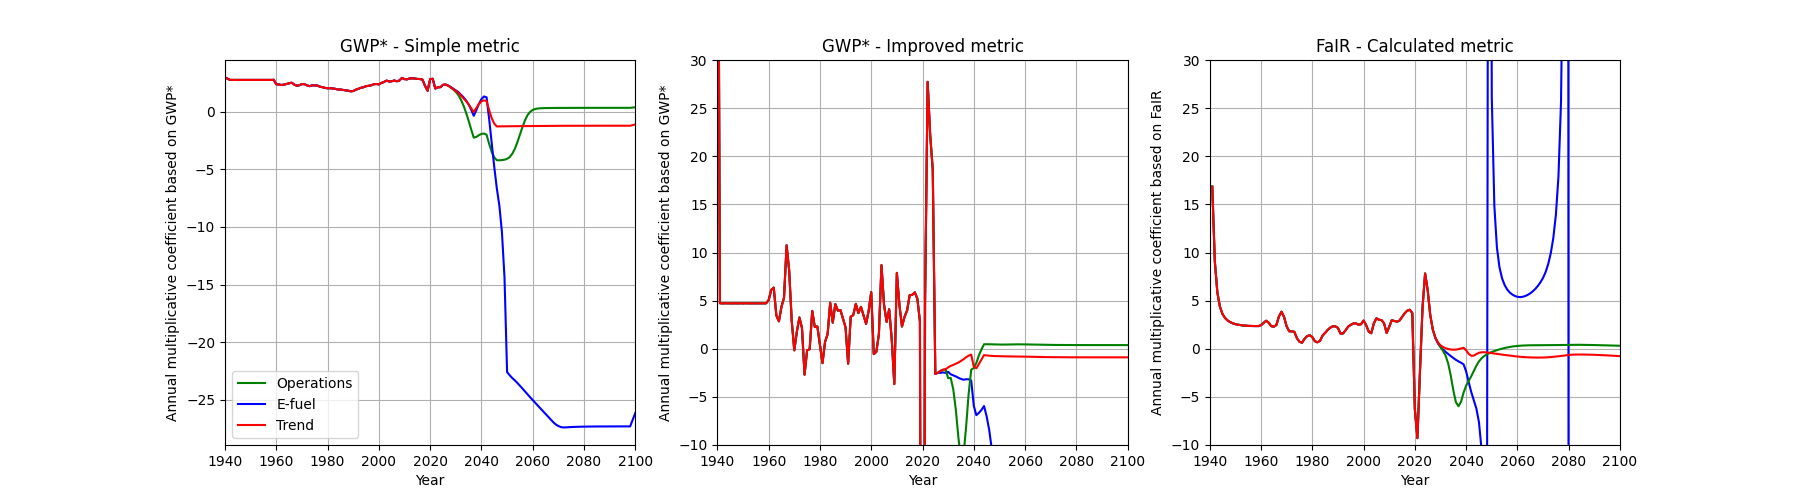

In [63]:
fig, axs = plt.subplots(1,3, figsize=(18,5))

axs[0].plot(
    data_years_total,
    process11simple.data["climate_outputs"]["total_equivalent_emissions"]/process11simple.data["climate_outputs"]["co2_emissions"],
    color="green",
    label="Operations",
    linestyle="-",
)
axs[0].plot(
    data_years_total,
    process10simple.data["climate_outputs"]["total_equivalent_emissions"]/process10simple.data["climate_outputs"]["co2_emissions"],
    color="blue",
    label="E-fuel",
    linestyle="-",
)
axs[0].plot(
    data_years_total,
    process9simple.data["climate_outputs"]["total_equivalent_emissions"]/process9simple.data["climate_outputs"]["co2_emissions"],
    color="red",
    label="Trend",
    linestyle="-",
)
axs[0].set(
    xlabel='Year',
    ylabel="Annual multiplicative coefficient based on GWP*",
    title="GWP* - Simple metric"
)
axs[0].legend()

axs[1].plot(
    data_years_total,
    process10improve.data["climate_outputs"]["total_equivalent_emissions"]/process10improve.data["climate_outputs"]["co2_emissions"],
    color="blue",
    linestyle="-",
)
axs[1].plot(
    data_years_total,
    process11improve.data["climate_outputs"]["total_equivalent_emissions"]/process11improve.data["climate_outputs"]["co2_emissions"],
    color="green",
    linestyle="-",
)
axs[1].plot(
    data_years_total,
    process9improve.data["climate_outputs"]["total_equivalent_emissions"]/process9improve.data["climate_outputs"]["co2_emissions"],
    color="red",
    linestyle="-",
)
axs[1].set(
    xlabel='Year',
    ylabel="Annual multiplicative coefficient based on GWP*",
    title="GWP* - Improved metric"
)

axs[2].plot(
    data_years_total[1:2101-1941+1],
    annual_fair_coefficient10,
    color="blue",
    linestyle="-",
)
axs[2].plot(
    data_years_total[1:2101-1941+1],
    annual_fair_coefficient11,
    color="green",
    linestyle="-",
)
axs[2].plot(
    data_years_total[1:2101-1941+1],
    annual_fair_coefficient9,
    color="red",
    linestyle="-",
)
axs[2].set(
    xlabel='Year',
    ylabel="Annual multiplicative coefficient based on FaIR",
    title="FaIR - Calculated metric"
)

axs[0].grid()
axs[1].grid()
axs[2].grid()

axs[0].set_xlim(1940,2100)
axs[1].set_xlim(1940,2100)
axs[1].set_ylim(-10,30)
axs[2].set_xlim(1940,2100)
axs[2].set_ylim(-10,30)

plt.show()

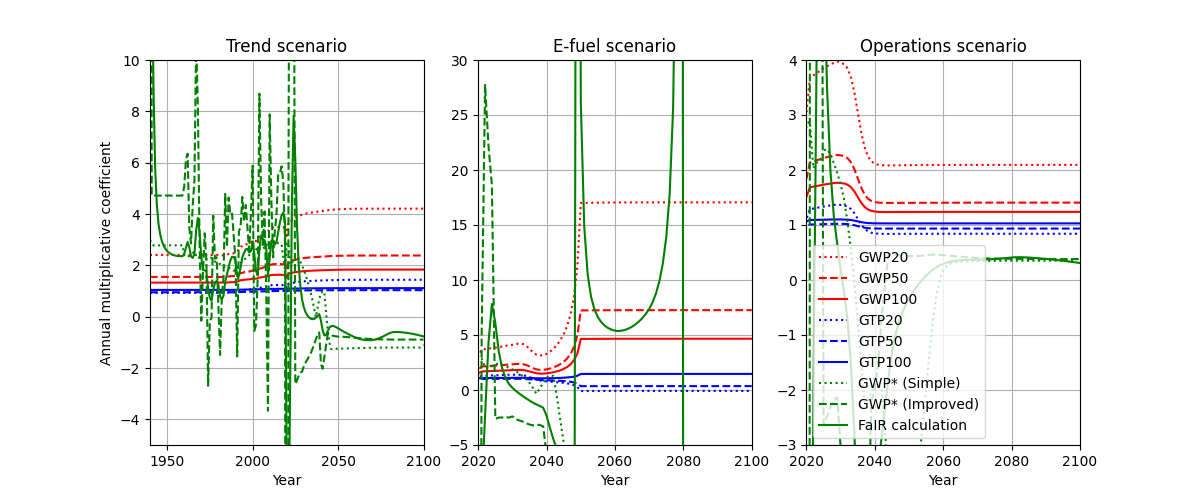

In [64]:
fig, axs = plt.subplots(1,3, figsize=(12,5))

axs[0].plot(
    data_years_total,
    gwp20_multiplicative_coefficient9,
    color="red",
    label="GWP20",
    linestyle=":",
)
axs[0].plot(
    data_years_total,
    gwp50_multiplicative_coefficient9,
    color="red",
    label="GWP50",
    linestyle="--",
)
axs[0].plot(
    data_years_total,
    gwp100_multiplicative_coefficient9,
    color="red",
    label="GWP100",
    linestyle="-",
)
axs[0].plot(
    data_years_total,
    gtp20_multiplicative_coefficient9,
    color="blue",
    label="GTP20",
    linestyle=":",
)
axs[0].plot(
    data_years_total,
    gtp50_multiplicative_coefficient9,
    color="blue",
    label="GTP50",
    linestyle="--",
)
axs[0].plot(
    data_years_total,
    gtp100_multiplicative_coefficient9,
    color="blue",
    label="GTP100",
    linestyle="-",
)
axs[0].plot(
    data_years_total,
    process9simple.data["climate_outputs"]["total_equivalent_emissions"]/process9simple.data["climate_outputs"]["co2_emissions"],
    color="green",
    label="Simple GWP*",
    linestyle=":",
)
axs[0].plot(
    data_years_total,
    process9improve.data["climate_outputs"]["total_equivalent_emissions"]/process9improve.data["climate_outputs"]["co2_emissions"],
    color="green",
    label="Improved GWP*",
    linestyle="--",
)
axs[0].plot(
    data_years_total[1:2101-1941+1],
    annual_fair_coefficient9,
    color="green",
    label="Calculated FaIR",
    linestyle="-",
)
axs[0].set(
    xlabel="Year",
    ylabel="Annual multiplicative coefficient",
    title="Trend scenario"
)

axs[1].plot(
    data_years_total,
    gwp20_multiplicative_coefficient10,
    color="red",
    linestyle=":",
)
axs[1].plot(
    data_years_total,
    gwp50_multiplicative_coefficient10,
    color="red",
    linestyle="--",
)
axs[1].plot(
    data_years_total,
    gwp100_multiplicative_coefficient10,
    color="red",
    linestyle="-",
)
axs[1].plot(
    data_years_total,
    gtp20_multiplicative_coefficient10,
    color="blue",
    linestyle=":",
)
axs[1].plot(
    data_years_total,
    gtp50_multiplicative_coefficient10,
    color="blue",
    linestyle="--",
)
axs[1].plot(
    data_years_total,
    gtp100_multiplicative_coefficient10,
    color="blue",
    linestyle="-",
)
axs[1].plot(
    data_years_total,
    process10simple.data["climate_outputs"]["total_equivalent_emissions"]/process10simple.data["climate_outputs"]["co2_emissions"],
    color="green",
    linestyle=":",
)
axs[1].plot(
    data_years_total,
    process10improve.data["climate_outputs"]["total_equivalent_emissions"]/process10improve.data["climate_outputs"]["co2_emissions"],
    color="green",
    linestyle="--",
)
axs[1].plot(
    data_years_total[1:2101-1941+1],
    annual_fair_coefficient10,
    color="green",
    linestyle="-",
)
axs[1].set(
    xlabel="Year",
    title="E-fuel scenario"
)

axs[2].plot(
    data_years_total,
    gwp20_multiplicative_coefficient11,
    color="red",
    label="GWP20",
    linestyle=":",
)
axs[2].plot(
    data_years_total,
    gwp50_multiplicative_coefficient11,
    color="red",
    label="GWP50",
    linestyle="--",
)
axs[2].plot(
    data_years_total,
    gwp100_multiplicative_coefficient11,
    color="red",
    label="GWP100",
    linestyle="-",
)
axs[2].plot(
    data_years_total,
    gtp20_multiplicative_coefficient11,
    color="blue",
    label="GTP20",
    linestyle=":",
)
axs[2].plot(
    data_years_total,
    gtp50_multiplicative_coefficient11,
    color="blue",
    label="GTP50",
    linestyle="--",
)
axs[2].plot(
    data_years_total,
    gtp100_multiplicative_coefficient11,
    color="blue",
    label="GTP100",
    linestyle="-",
)
axs[2].plot(
    data_years_total,
    process11simple.data["climate_outputs"]["total_equivalent_emissions"]/process11simple.data["climate_outputs"]["co2_emissions"],
    color="green",
    label="GWP* (Simple)",
    linestyle=":",
)
axs[2].plot(
    data_years_total,
    process11improve.data["climate_outputs"]["total_equivalent_emissions"]/process11improve.data["climate_outputs"]["co2_emissions"],
    color="green",
    label="GWP* (Improved)",
    linestyle="--",
)
axs[2].plot(
    data_years_total[1:2101-1941+1],
    annual_fair_coefficient11,
    color="green",
    label="FaIR calculation",
    linestyle="-",
)
axs[2].set(
    xlabel="Year",
    title="Operations scenario"
)
axs[2].legend()

axs[0].grid()
axs[1].grid()
axs[2].grid()

axs[0].set_xlim(1940,2100)
axs[0].set_ylim(-5,10)
axs[1].set_xlim(2020,2100)
axs[1].set_ylim(-5,30)
axs[2].set_xlim(2020,2100)
axs[2].set_ylim(-3,4)

plt.show()